In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@         INITIAL SETTINGS - НАЧАЛЬНЫЕ УСТАНОВКИ          @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [1]:
# Pandas
import pandas as pd
import numpy as np

In [2]:
# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Date & Time
from datetime import datetime

In [4]:
# Установка, чтобы показывались все имеющиеся столбцы
pd.options.display.max_columns = None

In [171]:
# Установка расширения ТОС - боковой банели навигации
# jupyter labextension install @jupyterlab/toc

In [174]:
# Установка nbextensions
# Установка может быть выполнена через Conda или PIP

# If conda:
# conda install -c conda-forge jupyter_contrib_nbextensions
# or with pip:
# !pip install jupyter_contrib_nbextensions

In [ ]:
# Сохранение результатов в формате Excel
# print(auto_report_phr)
# auto_report_phr.to_excel('C:/Users/Андрей/Downloads/barrels_test_report.xlsx')

In [ ]:
## Downloads <a class="anchor" id="downloads"></a>

# @@@@@@@@@@@@         DOWNLOADS         @@@@@@@@@@@@

In [5]:
# ОБЩИЙ С НАЧАЛА РЕКЛАМНОЙ КАМПАНИИ (с 13.11.2023 по ...) - ALL
# Сохраняем в переменную путь для скачивания файла (по умолчанию - загрузки)
conversions = 'C:/Users/Андрей/Downloads/conversions_all.csv'
phrases = 'C:/Users/Андрей/Downloads/phrases_all.csv'

# Сохраняем в переменную путь для скачивания файла (окончательная папка для хранения - одноименная с файлом папка)
# conversions = 'C:/Users/Андрей/my_learning/Spektr/conversions_all.csv'
# phrases = 'C:/Users/Андрей/my_learning/Spektr/phrases_all.csv'


# ЗА ПОСЛЕДНЮЮ (или вообще любую с понедельника по воскресенье) - WEEK
# Сохраняем в переменную путь для скачивания файла (по умолчанию - загрузки)
conversions_week = 'C:/Users/Андрей/Downloads/conversions_week.csv'
phrases_week = 'C:/Users/Андрей/Downloads/phrases_week.csv'

# Сохраняем в переменную путь для скачивания файла (окончательная папка для хранения - одноименная с файлом папка)
# conversions_week = 'C:/Users/Андрей/my_learning/Spektr/conversions_week.csv'
# phrases_week = 'C:/Users/Андрей/my_learning/Spektr/phrases_week.csv'

In [338]:
# Поисковая информация по КОНВЕРСИЯМ, агрегированная по дням
pd.read_csv(conversions, skiprows=4, sep=';').head()

,Дата,Группа,№ Группы,Условие показа,№ Условия показа,Показы,Клики,CTR (%),Расход (руб.),Ср. цена клика (руб.),Конверсии
0,14.11.2023,Все регионы,5309394238,баня бочка -дачи -квадро -ключ -купить -недоро...,48438431556,5,1,"20,00","13,34","13,34",-
1,14.11.2023,Все регионы,5309394238,баня бочка под ключ -цена,48438431563,1,0,"0,00","0,00",-,-
2,14.11.2023,Все регионы,5309394238,баня бочка под ключ цена,48438431566,1,0,"0,00","0,00",-,-
3,15.11.2023,Все регионы,5309394238,баня бочка -дачи -квадро -ключ -купить -недоро...,48438431556,19,0,"0,00","0,00",-,-
4,15.11.2023,Все регионы,5309394238,баня бочка недорого -цена,48438431561,1,0,"0,00","0,00",-,-


In [5]:
# Поисковая информация по ФРАЗАМ, агрегированная по дням
pd.read_csv(phrases_week, skiprows=4, sep=';').head()

,Дата,Поисковый запрос,Группа,№ Группы,Условие показа,№ Условия показа,Показы,Клики,CTR (%),Расход (руб.),Ср. цена клика (руб.),Конверсии
0,12.04.2024,бани бочки сыктывкар,Сыктывкар,5386222742,баня бочка сыктывкар -квадро -купить -цена,49778520753,7,2,"28,57","89,94","44,97",1
1,12.04.2024,баня бочка,Все регионы,5309394238,баня бочка -дачи -квадро -ключ -купить -недоро...,48438431556,7,2,"28,57","85,19","42,59",2
2,08.04.2024,бани бочки сыктывкар,Сыктывкар,5386222742,баня бочка сыктывкар -квадро -купить -цена,49778520753,5,3,"60,00","91,21","30,40",3
3,08.04.2024,баня бочка под ключ цена,Все регионы,5309394238,баня бочка под ключ цена,48438431566,5,1,"20,00","18,97","18,97",-
4,12.04.2024,бани бочки под ключ г уржум кировской области,Все регионы,5309394238,'---autotargeting,47846409878,5,5,"100,00","144,13","28,83",4


In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@          FUNCTIONS         @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [7]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          function CONVERSIONS_downloads         $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция считывает файл, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def conversions_downloads(file_path):
    look_up = {'01': 'Январь', '02': 'Февраль', '03': 'Март', '04': 'Апрель', '05': 'Май', '06': 'Июнь',
           '07': 'Июль', '08': 'Август', '09': 'Сентябрь', '10': 'Октябрь', '11': 'Ноябрь', '12': 'Декабрь'}
    df = pd.read_csv(file_path, skiprows=4, sep=';')
    df = df \
    .iloc[:, [0, 1, 3, 5, 6, 7, 8, 9, 10]] \
    .rename(columns={'Дата': 'date',
                    'Группа': 'group',
                    'Условие показа': 'condition',
                    'Показы': 'shows',
                    'Клики': 'click',
                    'CTR (%)': 'ctr',
                    'Расход (руб.)': 'expense',
                    'Ср. цена клика (руб.)': 'average_cost_click',
                    'Конверсии': 'conversion'}) \
    .replace('-', 0) \
    .replace("'---autotargeting", 'autotargeting')
    

# Удаляем минус-слова из условий показа; преобразуем числовые данные в десятичную дробь
    df['condition'] = df['condition'].apply(lambda x: x.split(' -')[0])
    df.loc[:, 'ctr':'average_cost_click'] = df.loc[:, 'ctr':'average_cost_click'].replace(',','.', regex=True).astype(float)

# преобразуем числовые данные в целочисленный формат (показы, клики, конверсии)
    df[['shows', 'click', 'conversion']] = df[['shows', 'click', 'conversion']].astype(str).astype(int)
    
# разбиваем колонку даты на 3 (месяцы по русски, числа, месяцы и годы в целочисленный формат) для дальнейшего анализа
    df['date_number'] = df['date'].apply(lambda x: x.split('.')[0]).astype(str).astype(int)
    df['month'] = df['date'].apply(lambda x: x.split('.')[1]).apply(lambda x: look_up[x])
    df['month_number'] = df['date'].apply(lambda x: x.split('.')[1]).astype(str).astype(int)
    df['year'] = df['date'].apply(lambda x: x.split('.')[2]).astype(str).astype(int)
    
    return df

In [340]:
con = conversions_downloads(conversions)
con.shape

(1727, 13)

In [341]:
con.shows.sum()

7314

In [342]:
con.head(3)

,date,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
0,14.11.2023,Все регионы,баня бочка,5,1,20.0,13.34,13.34,0,14,Ноябрь,11,2023
1,14.11.2023,Все регионы,баня бочка под ключ,1,0,0.0,0.00,0.00,0,14,Ноябрь,11,2023
2,14.11.2023,Все регионы,баня бочка под ключ цена,1,0,0.0,0.00,0.00,0,14,Ноябрь,11,2023


In [ ]:
# WEEK

In [343]:
con_w = conversions_downloads(conversions_week)
con.shape

(1727, 13)

In [344]:
con_w.shows.sum()

399

In [345]:
con_w.head(3)

,date,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
0,25.03.2024,Все регионы,бани бочки,1,0,0.0,0.0,0.0,0,25,Март,3,2024
1,25.03.2024,Все регионы,баня бочка,5,0,0.0,0.0,0.0,0,25,Март,3,2024
2,25.03.2024,Все регионы,баня бочка под ключ,1,0,0.0,0.0,0.0,0,25,Март,3,2024


In [420]:
# Сохранение результатов в формате Excel
# print(auto_report_phr)
con.to_excel('C:/Users/Андрей/Downloads/conv.xlsx')
# phr.to_excel('C:/Users/Андрей/Downloads/phr.xlsx')

In [851]:
# Делаем выборку - БЕЗ АВТОТАРГЕТИНГа
no_auto_con = con.query("condition != 'autotargeting'")
no_auto_con.shape

(1230, 13)

In [441]:
# Та же самая табличка ТОЛЬКО без АВТОТАРГЕТА
no_auto_con.head(3)

,date,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
0,14.11.2023,Все регионы,баня бочка,5,1,20.0,13.34,13.34,0,14,Ноябрь,11,2023
1,14.11.2023,Все регионы,баня бочка под ключ,1,0,0.0,0.00,0.00,0,14,Ноябрь,11,2023
2,14.11.2023,Все регионы,баня бочка под ключ цена,1,0,0.0,0.00,0.00,0,14,Ноябрь,11,2023


In [852]:
# Делаем выборку - ТОЛЬКО АВТОТАРГЕТ
auto_con = con.query("condition == 'autotargeting'")
auto_con.shape

(369, 13)

In [443]:
# Та же самая табличка ТОЛЬКО АВТОТАРГЕТ
auto_con.head(3)

,date,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
5,15.11.2023,Все регионы,autotargeting,1,0,0.0,0.0,0.0,0,15,Ноябрь,11,2023
11,16.11.2023,Все регионы,autotargeting,2,0,0.0,0.0,0.0,0,16,Ноябрь,11,2023
19,17.11.2023,Все регионы,autotargeting,3,0,0.0,0.0,0.0,0,17,Ноябрь,11,2023


In [6]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          function PHRASES_downloads         $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция считывает файл, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
# Для анализа условий показа и поисковых запросов
def phrases_downloads(file_path):
    look_up = {'01': 'Январь', '02': 'Февраль', '03': 'Март', '04': 'Апрель', '05': 'Май', '06': 'Июнь',
           '07': 'Июль', '08': 'Август', '09': 'Сентябрь', '10': 'Октябрь', '11': 'Ноябрь', '12': 'Декабрь'}
    df = pd.read_csv(file_path, skiprows=4, sep=';')
    df = df \
    .iloc[:, [0, 1, 2, 4, 6, 7, 8, 9, 10, 11]] \
    .rename(columns={'Дата': 'date',
                    'Поисковый запрос': 'search_query',
                    'Группа': 'group',
                    'Условие показа': 'condition',
                    'Показы': 'shows',
                    'Клики': 'click',
                    'CTR (%)': 'ctr',
                    'Расход (руб.)': 'expense',
                    'Ср. цена клика (руб.)': 'average_cost_click',
                    'Конверсии': 'conversion'}) \
    .replace('-', 0) \
    .replace("'---autotargeting", 'autotargeting')
    

# Удаляем минус-слова из условий показа; преобразуем числовые данные в десятичную дробь
    df['condition'] = df['condition'].apply(lambda x: x.split(' -')[0])
    df.loc[:, 'ctr':'average_cost_click'] = df.loc[:, 'ctr':'average_cost_click'].replace(',','.', regex=True).astype(float)

# преобразуем числовые данные в целочисленный формат (показы, клики, конверсии)
    df[['shows', 'click', 'conversion']] = df[['shows', 'click', 'conversion']].astype(str).astype(int)

# разбиваем колонку даты на 3 (месяцы по русски, числа, месяцы и годы в целочисленный формат) для дальнейшего анализа
    df['date_number'] = df['date'].apply(lambda x: x.split('.')[0]).astype(str).astype(int)
    df['month'] = df['date'].apply(lambda x: x.split('.')[1]).apply(lambda x: look_up[x])
    df['month_number'] = df['date'].apply(lambda x: x.split('.')[1]).astype(str).astype(int)
    df['year'] = df['date'].apply(lambda x: x.split('.')[2]).astype(str).astype(int)

    return df

In [7]:
# Общее количество поисковых запросов за весь период
phr = phrases_downloads(phrases)
phr.shape

(7089, 14)

In [8]:
# Общее количество поисковых запросов за неделю
phr_w = phrases_downloads(phrases_week)
phr_w.shape

(292, 14)

In [9]:
# Общее количество показов
phr.shows.sum()

9490

In [10]:
# Количество показов за неделю
phr_w.shows.sum()

402

In [366]:
# Количество показов по группам:
# Группа "Все регионы":
print(phr.query("group == 'Все регионы'").shows.sum())

4638


# Количество показов и кликов по регионам:

In [13]:
# Получаем уникальные значения в столбце и сортируем их
groups = sorted(phr['group'].unique())
groups
# sorted(groups)

['Все регионы', 'Дальние', 'Коряжма', 'Котлас', 'Сыктывкар', 'Устюг']

In [14]:
# Вывод в цикле всех показов по группам:
print('Группа      | Show | Click | Expense | Conv |')
print('---------------------------------------------')
for row in groups:
    print('{: <11} | {: <4} | {: <5} | {: <7} | {: <4} |'.format(row, phr.query("group == @row").shows.sum(),
                                                phr.query("group == @row").click.sum(),
                                                round(phr.query("group == @row").expense.sum(), 2),
                                                phr.query("group == @row").conversion.sum()
                                              ))

Группа      | Show | Click | Expense | Conv |
---------------------------------------------
Все регионы | 6158 | 461   | 13681.74 | 125  |
Дальние     | 1636 | 227   | 7901.78 | 72   |
Коряжма     | 299  | 64    | 2423.54 | 30   |
Котлас      | 592  | 136   | 5313.78 | 86   |
Сыктывкар   | 731  | 233   | 6850.14 | 109  |
Устюг       | 74   | 22    | 680.95  | 8    |


In [15]:
# Вывод в цикле НЕДЕЛЬНЫХ показов по группам:
print('Группа      | Show | Click | Expense | Conv |')
print('---------------------------------------------')
for row in groups:
    print('{: <11} | {: <4} | {: <5} | {: <7} | {: <4} |'.format(row, phr_w.query("group == @row").shows.sum(),
                                                phr_w.query("group == @row").click.sum(),
                                                round(phr_w.query("group == @row").expense.sum(), 2),
                                                phr_w.query("group == @row").conversion.sum()
                                              ))

Группа      | Show | Click | Expense | Conv |
---------------------------------------------
Все регионы | 229  | 17    | 529.07  | 4    |
Дальние     | 86   | 10    | 556.7   | 1    |
Коряжма     | 0    | 0     | 0.0     | 0    |
Котлас      | 22   | 8     | 690.6   | 6    |
Сыктывкар   | 65   | 23    | 419.95  | 14   |
Устюг       | 0    | 0     | 0.0     | 0    |


In [17]:
phr.head(3)

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
0,24.03.2024,баня под ключ в сыктывкаре,Сыктывкар,баня под ключ сыктывкар,1,1,100.0,83.58,83.58,1,24,Март,3,2024
1,21.03.2024,баня под ключ,Все регионы,баня под ключ,1,1,100.0,83.57,83.57,0,21,Март,3,2024
2,23.03.2024,бани бочки модель икс эль 4 на 3,Коряжма,autotargeting,1,1,100.0,82.49,82.49,1,23,Март,3,2024


# Показы по регионам

# Все регионы

In [352]:
# Получаем уникальные значения в группе и сортируем их по алфавиту
search_unique_group_vs = sorted(phr.query("group == 'Все регионы'").search_query.unique())
# Количество уникальных запросов:
nunique_group_vs = phr.query("group == 'Все регионы'").search_query.nunique() # (1987)

# print('Всего уникальных запросов: {} ||| Первые 10 по алфавиту: {}'.format(nunique_group_vs, search_unique_group_vs[:10]))
print('Всего уникальных запросов: {} ||| Все уникальные запросы по алфавиту: {}'.format(nunique_group_vs, search_unique_group_vs))
# search_unique_group_vs

Всего уникальных запросов: 189 ||| Все уникальные запросы по алфавиту: ['аквапарк ярославль бани бочка', 'бак из нержавейки для бани купить', 'бани', 'бани бочка купить под ключ с печью недорого', 'бани бочки в лосте', 'бани бочки в тотьме', 'бани бочки квадро 5м с помывочной и парилкой', 'бани бочки кировская область', 'бани бочки под ключ', 'бани бочки под ключ вологодская слобода', 'бани бочки ск групп', 'бани в вологодской области под ключ недорого', 'бани в кировской области купить', 'бани и готовые', 'бани из контейнеров', 'бани кировская область готовые бани в кировской области', 'бани модульные', 'бани под заказ мураши', 'бани под ключ банька 4 сезона кировская обл', 'бани под ключ в кировской области с доставкой недорого', 'бани под ключ вологодская область цена', 'бани под ключ тотьма', 'бани цена вологодская область', 'банная бочка для купания', 'банная печь ермак 12 купить', 'баня 4 4 оцилиндровка цены', 'баня 4х6', 'баня 5х6 щитовая', 'баня 6 2.30', 'баня 6 на 6', 'баня 6х

# Дальние

In [353]:
# Получаем уникальные значения в группе и сортируем их по алфавиту
search_unique_group_da = sorted(phr.query("group == 'Дальние'").search_query.unique())
# Количество уникальных запросов:
nunique_group_da = phr.query("group == 'Дальние'").search_query.nunique() # (806)

# print('Всего уникальных запросов: {} ||| Первые 10 по алфавиту: {}'.format(nunique_group_da, search_unique_group_da[:10]))
print('Всего уникальных запросов: {} ||| Все уникальные запросы по алфавиту: {}'.format(nunique_group_da, search_unique_group_da))
# search_unique_group_da

Всего уникальных запросов: 10 ||| Все уникальные запросы по алфавиту: ['бани бочки под ключ вологодская область', 'баня бочка в красноборске', 'баня бочка вологодская область купить', 'баня каркасная 2.5 на 3.5', 'готовые бани под ключ в кировской области', 'каркасные бани под ключ из кировской области', 'купить баню бочку в кировской области', 'купить баню в городе луза', 'купить баню в красноборске архангельской области', 'стоимость каркасной бани']


# Сыктывкар

In [354]:
# Получаем уникальные значения в группе и сортируем их по алфавиту
search_unique_group_sy = sorted(phr.query("group == 'Сыктывкар'").search_query.unique())
# Количество уникальных запросов:
nunique_group_sy = phr.query("group == 'Сыктывкар'").search_query.nunique() # (110)

# print('Всего уникальных запросов: {} ||| Первые 10 по алфавиту: {}'.format(nunique_group_sy, search_unique_group_sy[:10]))
print('Всего уникальных запросов: {} ||| Все уникальные запросы по алфавиту: {}'.format(nunique_group_sy, search_unique_group_sy))
# search_unique_group_sy

Всего уникальных запросов: 24 ||| Все уникальные запросы по алфавиту: ['бани в сыктывкаре под ключ', 'бани под заказ в сыктывкаре', 'бани под ключ в сыктывкаре', 'бани под ключ сыктывкар', 'бани под ключ сыктывкаре цена', 'баня бочка квадро овал под ключ цена в сыктывкаре', 'баня бочка под ключ цена в сыктывкаре', 'баня бочка сыктывкар', 'баня бочка сыктывкар цена', 'баня бочка сыктывкар цена купить', 'баня в кредит бочка сыктывкар', 'баня под ключ в сыктывкаре', 'баня под ключ в сыктывкаре цены', 'вятский банщик баня бочка сыктывкар', 'готовая баня в сыктывкаре', 'готовые бани в сыктывкаре', 'готовые бани в сыктывкаре цены', 'изготовление сауны под ключ в сыктывкаре', 'купить баню бочка сыктывкар', 'купить баню бочку в сыктывкаре', 'купить баню под ключ в сыктывкаре недорого', 'мобильные бани город сыктывкар', 'мобильные бани сыктывкар купить', 'сауна в сыктывкаре недорого сыктывкар']


# Котлас

In [355]:
# Получаем уникальные значения в группе и сортируем их по алфавиту
search_unique_group_kt = sorted(phr.query("group == 'Котлас'").search_query.unique())
# Количество уникальных запросов:
nunique_group_kt = phr.query("group == 'Котлас'").search_query.nunique() # (203)

# print('Всего уникальных запросов: {} ||| Первые 10 по алфавиту: {}'.format(nunique_group_kt, search_unique_group_kt[:10]))
print('Всего уникальных запросов: {} ||| Все уникальные запросы по алфавиту: {}'.format(nunique_group_kt, search_unique_group_kt))
# search_unique_group_kt

Всего уникальных запросов: 23 ||| Все уникальные запросы по алфавиту: ['бани бочки в котласе', 'бани бочки котлас', 'баня бочка в котласе', 'баня бочка в котласе 170 см', 'баня бочка в котласе цена под ключ', 'баня бочка квадро 4 метра с боковым входом', 'баня бочка квадро 5 метров с боковым входом', 'баня бочка котлас', 'баня бочка купить котлас', 'баня квадро бочка в котласе', 'баня квадро в котласе', 'баня квадро на 5 2 метра', 'баня под ключ с доставкой и установкой г котлас', 'баня под ключ цена в котласе', 'г котлас бани под ключ', 'каркасная баня котлас', 'купить баню бочку в городе котласе', 'купить баню бочку в котласе', 'купить баню бочку под ключ в котласе', 'купить баню под ключ в котласе', 'купить готовую баню под ключ в котласе', 'мобильные бани под ключ котлас', 'модульные бани']


In [94]:
# Упоминание КОТЛАСА за всю кампанию
phr[phr.search_query.str.contains(r'\bкотлас')].shape[0]

267

In [95]:
# Сколько ВСЕГО запросов с упоминанием КОТЛАСА
phr_kot = phr[phr.search_query.str.contains(r'\bкотлас')]
phr_kot.shape

(267, 14)

In [96]:
# Сколько уникальных запросов с упоминанием КОТЛАСА
phr_kot.search_query.unique().shape[0]

133

# Коряжма

In [15]:
# Получаем уникальные значения в группе и сортируем их по алфавиту
search_unique_group_kr = sorted(phr_w.query("group == 'Коряжма'").search_query.unique())
# Количество уникальных запросов:
nunique_group_kr = phr_w.query("group == 'Коряжма'").search_query.nunique() # (135)

# print('Всего уникальных запросов за НЕДЕЛЮ: {} ||| Первые 10 по алфавиту: {}'.format(nunique_group_kr, search_unique_group_kr[:10]))
print('Всего уникальных запросов за НЕДЕЛЮ: {} ||| Все уникальные запросы за НЕДЕЛЮ по алфавиту: {}'.format(nunique_group_kr, search_unique_group_kr))
# search_unique_group_kr

Всего уникальных запросов за НЕДЕЛЮ: 12 ||| Все уникальные запросы за НЕДЕЛЮ по алфавиту: ['бани 6 × 4', 'бани бочки в коряжме', 'баня 6на 6 с угловой террасой цена', 'баня 6х3', 'баня бочка под ключ цена самая большая', 'баня купить на дачу', 'баня на заказ под ключ', 'бочки бани в коряжме', 'готовая баня под ключ бочка', 'маленькие бани для дачи', 'сайт бани бочки', 'сколько по времени делается баня бочка']


In [16]:
week_kor = phr_w.query("group == 'Коряжма'")
week_kor.shape

(13, 14)

In [17]:
week_kor.shows.sum()

14

In [65]:
week_kor.head(4)

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
36,09.04.2024,мини баня под ключ недорого,Коряжма,autotargeting,2,0,0.0,0.0,0.0,0,9,Апрель,4,2024
105,08.04.2024,баня бочка су,Коряжма,autotargeting,1,0,0.0,0.0,0.0,0,8,Апрель,4,2024
143,08.04.2024,сколько стоит баня под ключ,Коряжма,autotargeting,1,0,0.0,0.0,0.0,0,8,Апрель,4,2024
149,08.04.2024,цена готовой бани под ключ в архангельской обл...,Коряжма,autotargeting,1,0,0.0,0.0,0.0,0,8,Апрель,4,2024


In [18]:
week_kor.search_query.unique()

array(['бочки бани в коряжме', 'баня 6на 6 с угловой террасой цена',
       'баня купить на дачу', 'маленькие бани для дачи',
       'бани бочки в коряжме', 'сайт бани бочки', 'баня 6х3',
       'баня на заказ под ключ', 'баня бочка под ключ цена самая большая',
       'готовая баня под ключ бочка', 'бани 6 × 4',
       'сколько по времени делается баня бочка'], dtype=object)

In [79]:
list_kor = week_kor.search_query.to_list()
list_kor[5]

'бани бочки коряжма'

# Поиск строк, удовлетворяющих значению подстроки

In [19]:
# Поиск в предварительно подготовленном ДФ
week_kor[week_kor.search_query.str.contains(r'\bкоряжм')]

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
84,21.04.2024,бочки бани в коряжме,Коряжма,баня бочка коряжма,2,1,50.0,70.64,70.64,1,21,Апрель,4,2024
257,18.04.2024,бани бочки в коряжме,Коряжма,баня бочка коряжма,1,1,100.0,27.42,27.42,0,18,Апрель,4,2024


In [20]:
# Упоминание КОРЯЖМЫ за неделю
phr_w[phr_w.search_query.str.contains(r'\bкоряжм')]

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
84,21.04.2024,бочки бани в коряжме,Коряжма,баня бочка коряжма,2,1,50.0,70.64,70.64,1,21,Апрель,4,2024
257,18.04.2024,бани бочки в коряжме,Коряжма,баня бочка коряжма,1,1,100.0,27.42,27.42,0,18,Апрель,4,2024


In [21]:
# Упоминание КОРЯЖМЫ за всю кампанию
phr[phr.search_query.str.contains(r'\bкоряжм')].shape[0]

39

In [87]:
phr[phr.search_query.str.contains(r'\bкоряжм')].query("group == 'Коряжма'").head(5)

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
150,31.03.2024,купить баню бочку в коряжме,Коряжма,баня бочка купить коряжма,4,1,25.00,20.46,20.46,0,31,Март,3,2024
201,21.12.2023,баня бочка коряжма,Коряжма,баня бочка коряжма,3,2,66.67,22.90,11.45,2,21,Декабрь,12,2023
433,27.11.2023,бани бочки коряжма,Коряжма,баня бочка коряжма,2,0,0.00,0.00,0.00,0,27,Ноябрь,11,2023
556,04.01.2024,цена бани бочки коряжма,Коряжма,баня бочка коряжма,2,0,0.00,0.00,0.00,0,4,Январь,1,2024
891,16.02.2024,баня бочка коряжма купить,Коряжма,баня бочка купить коряжма,2,1,50.00,39.07,39.07,0,16,Февраль,2,2024


In [22]:
# Сколько ВСЕГО запросов с упоминанием КОРЯЖМЫ
phr_kor = phr[phr.search_query.str.contains(r'\bкоряжм')]
phr_kor.shape

(39, 14)

In [23]:
# Сколько уникальных запросов с упоминанием КОРЯЖМЫ
phr_kor.search_query.unique().shape[0]

25

In [24]:
phr_kor.search_query.unique()

array(['купить баню бочку в коряжме', 'баня бочка коряжма',
       'бани бочки коряжма', 'цена бани бочки коряжма',
       'баня бочка коряжма купить',
       'купить баню под ключ недорого коряжма',
       'баня бочка под ключ цена коряжма', 'коряжма баня бочка',
       'коряжма баня городская телефон', 'мир кафеля коряжма бочка баня',
       'бочки бани в коряжме', 'баня бочка коряжма цена',
       'баня бочка под ключ коряжма цена', 'купить баню бочку коряжма',
       'готовые бани коряжма', 'кака организация строит бани из коряжмы',
       'мобильные бани коряжма', 'баня бочка коряжма купить 2024',
       'баня под ключ цена коряжма', 'баня бочка спектр коряжма',
       'коряжма бани бочки', 'коряжма строительство бань',
       'баня коряжма телефон', 'баня коряжма под ключ',
       'бани бочки в коряжме'], dtype=object)

In [90]:
sorted(phr_kor.search_query.unique())

['бани бочки в коряжме',
 'бани бочки коряжма',
 'баня бочка коряжма',
 'баня бочка коряжма купить',
 'баня бочка коряжма купить 2024',
 'баня бочка коряжма цена',
 'баня бочка под ключ коряжма цена',
 'баня бочка под ключ цена коряжма',
 'баня бочка спектр коряжма',
 'баня коряжма под ключ',
 'баня коряжма телефон',
 'баня под ключ цена коряжма',
 'готовые бани коряжма',
 'кака организация строит бани из коряжмы',
 'коряжма бани бочки',
 'коряжма баня бочка',
 'коряжма баня городская телефон',
 'коряжма строительство бань',
 'купить баню бочку в коряжме',
 'купить баню бочку коряжма',
 'купить баню под ключ недорого коряжма',
 'мир кафеля коряжма бочка баня',
 'мобильные бани коряжма',
 'цена бани бочки коряжма']

# Великий Устюг

In [357]:
# Получаем уникальные значения в группе и сортируем их по алфавиту
search_unique_group_vy = sorted(phr.query("group == 'Устюг'").search_query.unique())
# Количество уникальных запросов:
nunique_group_vy = phr.query("group == 'Устюг'").search_query.nunique() # (27)

# print('Всего уникальных запросов: {} ||| Первые 10 по алфавиту: {}'.format(nunique_group_vy, search_unique_group_vy[:10]))
print('Всего уникальных запросов: {} ||| Все уникальные запросы по алфавиту: {}'.format(nunique_group_vy, search_unique_group_vy))
# search_unique_group_vy

Всего уникальных запросов: 2 ||| Все уникальные запросы по алфавиту: ['баня бочка купить великий устюг', 'баня бочка под ключ цена великий устюг']


# Выборка ТОП-10 средних оплат за клики

In [25]:
# Общий список за неделю
def top_average_click(df, top):
    df = df.sort_values(['average_cost_click'], ascending = [False]) \
                    .head(top)
    
    return df

In [26]:
top_average = top_average_click(phr_w, 10)
# top_average.shape
top_average

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
32,15.04.2024,бани бочка в котласе цена под ключ,Котлас,баня под ключ цена котлас,2,2,100.0,189.14,94.57,2,15,Апрель,4,2024
426,21.04.2024,купить баню бочку,Все регионы,баня бочка купить,1,1,100.0,91.13,91.13,1,21,Апрель,4,2024
150,16.04.2024,бани бочки под ключ котлас,Котлас,баня бочка под ключ котлас,1,1,100.0,90.10,90.10,0,16,Апрель,4,2024
82,21.04.2024,баня бочка сыктывкар,Сыктывкар,баня бочка сыктывкар,2,1,50.0,71.08,71.08,0,21,Апрель,4,2024
84,21.04.2024,бочки бани в коряжме,Коряжма,баня бочка коряжма,2,1,50.0,70.64,70.64,1,21,Апрель,4,2024
56,17.04.2024,изготовление бань,Все регионы,изготовление бань,2,1,50.0,66.92,66.92,1,17,Апрель,4,2024
307,19.04.2024,баня бочка под ключ цена г котлас,Котлас,баня под ключ цена котлас,1,1,100.0,66.24,66.24,0,19,Апрель,4,2024
281,18.04.2024,купить баню бочку в котласе цены,Котлас,баня бочка купить котлас,1,1,100.0,61.19,61.19,1,18,Апрель,4,2024
97,15.04.2024,бани в котласе цена под ключ,Котлас,баня под ключ цена котлас,1,1,100.0,59.77,59.77,1,15,Апрель,4,2024
400,21.04.2024,баня бочка купить в котласе,Котлас,баня бочка купить котлас,1,1,100.0,59.05,59.05,1,21,Апрель,4,2024


In [27]:
# Сгруппированный по группам список за неделю - ПО СРЕДНЕЙ ЦЕНЕ ЗА КЛИК
def top_average_click_agg(df, top):
    df = df.sort_values(['average_cost_click'], ascending = [False]) \
                    .groupby(['group'], as_index=False) \
                    .head(top) \
                    .sort_values(['group', 'average_cost_click'], ascending = [True, False])
    
    return df

In [28]:
top_average_click = top_average_click_agg(phr_w, 5)
# top_average_click.shape
top_average_click

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
426,21.04.2024,купить баню бочку,Все регионы,баня бочка купить,1,1,100.00,91.13,91.13,1,21,Апрель,4,2024
56,17.04.2024,изготовление бань,Все регионы,изготовление бань,2,1,50.00,66.92,66.92,1,17,Апрель,4,2024
24,18.04.2024,баня бочка цена,Все регионы,баня бочка цена,3,1,33.33,53.40,53.40,0,18,Апрель,4,2024
209,17.04.2024,баня бочка под ключ,Все регионы,баня бочка под ключ,1,1,100.00,45.94,45.94,0,17,Апрель,4,2024
391,21.04.2024,бани бочки под ключ цена,Все регионы,autotargeting,1,1,100.00,42.68,42.68,0,21,Апрель,4,2024
394,21.04.2024,бани купить куйбышев новосибирская область тел...,Дальние,autotargeting,1,1,100.00,56.79,56.79,0,21,Апрель,4,2024
252,18.04.2024,архангельская область бани модульные,Дальние,autotargeting,1,1,100.00,53.76,53.76,1,18,Апрель,4,2024
386,20.04.2024,сколько стоит баня бочка,Дальние,autotargeting,1,1,100.00,37.78,37.78,0,20,Апрель,4,2024
419,21.04.2024,готовые деревянные бани под ключ в кировской о...,Дальние,autotargeting,1,1,100.00,32.02,32.02,0,21,Апрель,4,2024
298,19.04.2024,бани купить в вологодской области,Дальние,autotargeting,1,0,0.00,0.00,0.00,0,19,Апрель,4,2024


In [412]:
# Сохранение результатов в формате Excel
# print(auto_report_phr)
# phr.to_excel('C:/Users/Андрей/Downloads/phr.xlsx')

In [ ]:
# WEEK

In [22]:
# Общее количество поисковых запросов за выбранный период
phr_w = phrases_downloads(phrases_week)
phr_w.shape

(385, 14)

In [23]:
phr_w.shows.sum()

514

In [18]:
phr_w.head(3)

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
0,12.04.2024,бани бочки сыктывкар,Сыктывкар,баня бочка сыктывкар,7,2,28.57,89.94,44.97,1,12,Апрель,4,2024
1,12.04.2024,баня бочка,Все регионы,баня бочка,7,2,28.57,85.19,42.59,2,12,Апрель,4,2024
2,08.04.2024,бани бочки сыктывкар,Сыктывкар,баня бочка сыктывкар,5,3,60.00,91.21,30.40,3,8,Апрель,4,2024


In [869]:
# Делаем выборку - БЕЗ АВТОТАРГЕТИНГа
no_auto_phr = phr.query("condition != 'autotargeting'")
no_auto_phr.shape

(2439, 14)

In [452]:
# Та же самая табличка ТОЛЬКО без АВТОТАРГЕТА
no_auto_phr.head(3)

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
0,24.01.2024,бани под ключ недорого,Все регионы,баня под ключ,6,4,66.67,137.68,34.42,1,24,Январь,1,2024
1,08.01.2024,баня бочка под ключ цена,Все регионы,баня бочка под ключ цена,5,3,60.00,125.56,41.85,0,8,Январь,1,2024
2,21.02.2024,баня бочка сыктывкар цена,Сыктывкар,баня бочка сыктывкар,3,3,100.00,101.91,33.97,1,21,Февраль,2,2024


In [870]:
# Делаем выборку - ТОЛЬКО АВТОТАРГЕТ
auto_phr = phr.query("condition == 'autotargeting'")
auto_phr.shape

(2721, 14)

In [455]:
# Та же самая табличка ТОЛЬКО АВТОТАРГЕТ
auto_phr.head(3)

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
4,05.03.2024,баня бочка,Дальние,autotargeting,7,3,42.86,57.21,19.07,0,5,Март,3,2024
7,19.12.2023,купить недорогую баню под ключ,Все регионы,autotargeting,3,2,66.67,90.18,45.09,1,19,Декабрь,12,2023
13,14.01.2024,баня сокол вологодская область купить,Все регионы,autotargeting,2,2,100.00,90.31,45.16,1,14,Январь,1,2024


In [8]:
# Функция для преобразования месяцев из числа от 01 до 12 в название месяца на русском языке,
# добавить колонки месяца и года в виде целых чисел.

# !!!!!!!!!!!!     РАБОЧАЯ ФУНКЦИЯ - ОТКЛЮЧЕНА ЧТОБЫ НЕ ПУТАЛА ПОСЛЕДОВАТЕЛЬНОСТЬ ДЕЙСТВИЙ ПРИ ОБРАБОТКЕ ДАННЫХ   !!!!!!!!!!!!

# def month_digit(df, date_name):
#     look_up = {'01': 'Январь', '02': 'Февраль', '03': 'Март', '04': 'Апрель', '05': 'Май', '06': 'Июнь',
#            '07': 'Июль', '08': 'Август', '09': 'Сентябрь', '10': 'Октябрь', '11': 'Ноябрь', '12': 'Декабрь'}
#     df['month'] = df[date_name].apply(lambda x: x.split('.')[1]).apply(lambda x: look_up[x])
#     df['month_number'] = df[date_name].apply(lambda x: x.split('.')[1]).astype(str).astype(int)
#     df['year'] = df[date_name].apply(lambda x: x.split('.')[2]).astype(str).astype(int)
    
#     return df

In [17]:
# search = month_digit(search, 'date')

# @@@@@@@@@@@          ANALYTICS         @@@@@@@@@@@

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$          PHRASES         $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# REPORT_ALL

In [16]:
# &&&&&&&&&& REPORT_ALL &&&&&&&&&&                            ОСНОВНАЯ ВЫБОРКА ДЛЯ ОТЧЕТА
# ПО ЭТИМ ЗАПРОСАМ ПОКАЗОВ БОЛЕЕ 10 И КЛИКОВ БОЛЕЕ 2

# Делаем выборку - группируем по условиям показа и сопоставляем с поисковыми запросами,
# дополнительно группируем по категориям
# (вместе с AUTOTARGETING) # .query('click > 1') \

def report_more_10(df):

    df = df.groupby(['search_query'], as_index=False) \
        .agg({'shows':'sum', 'click':'sum', 'expense':'sum', 'conversion':'sum'}) \
        .query('shows > 10 & click > 2') \
        .sort_values(['shows', 'click', 'conversion'], ascending = [False, False, False])
    
    df['average'] = round(df['expense'] / df['click'], 2)
    df = df[['search_query', 'shows', 'click', 'expense', 'average', 'conversion']]
    
    return df

In [465]:
# Для справки: как объединить два условия в одной строке
# search.query("group == 'Срубы' & shows > 1").search_query

In [17]:
# Общий отчёт
report_more_10_phr = report_more_10(phr)
report_more_10_phr.shape

(29, 6)

In [18]:
report_more_10_phr.head(25)

,search_query,shows,click,expense,average,conversion
661,баня бочка,840,107,2575.33,24.07,31
858,баня бочка под ключ,159,30,951.31,31.71,7
965,баня бочка сыктывкар цена,151,59,1440.70,24.42,37
879,баня бочка под ключ цена,118,35,923.64,26.39,10
1340,баня под ключ,114,16,490.77,30.67,5
80,бани бочки,103,15,465.52,31.03,21
799,баня бочка купить,103,13,317.69,24.44,4
1424,баня под ключ цена,84,5,156.13,31.23,0
957,баня бочка сыктывкар,71,24,639.22,26.63,12
981,баня бочка цена,71,11,338.38,30.76,1


In [19]:
# Сохранение результатов в формате Excel
# print(auto_report_phr)
report_more_10_phr.to_excel('C:/Users/Андрей/Downloads/phr_a.xlsx')

# REPORT_WEEK

In [20]:
# &&&&&&&&&& REPORT_WEEK &&&&&&&&&&                            НЕДЕЛЬНАЯ ВЫБОРКА ДЛЯ ОТЧЕТА
# ПО ЭТИМ ЗАПРОСАМ ПОКАЗОВ БОЛЕЕ 2 И КЛИКОВ БОЛЕЕ 0

# Делаем выборку - группируем по условиям показа и сопоставляем с поисковыми запросами,
# дополнительно группируем по категориям
# (вместе с AUTOTARGETING) # .query('click > 1') \

def week_report_more_2(df):

    df = df.groupby(['search_query'], as_index=False) \
        .agg({'shows':'sum', 'click':'sum', 'expense':'sum', 'conversion':'sum'}) \
        .query('shows > 2 & click > 1') \
        .sort_values(['shows', 'click', 'conversion'], ascending = [False, False, False])
    
    df['average'] = round(df['expense'] / df['click'], 2)
    df = df[['search_query', 'shows', 'click', 'expense', 'average', 'conversion']]
    
    return df

In [21]:
# WEEK отчёт
w_report_more_2_phr = week_report_more_2(phr_w)
w_report_more_2_phr.shape

(8, 6)

In [22]:
w_report_more_2_phr.head(25)

,search_query,shows,click,expense,average,conversion
40,баня бочка,37,9,404.14,44.90,3
60,баня бочка сыктывкар цена,10,5,65.90,13.18,5
59,баня бочка сыктывкар,10,2,27.72,13.86,1
13,бани бочки сыктывкар,5,4,156.70,39.17,3
50,баня бочка купить в котласе,5,3,325.44,108.48,3
148,купить баню вологодская область,5,2,22.50,11.25,1
53,баня бочка под ключ цена,4,3,143.26,47.75,0
138,купить баню бочку в сыктывкаре,3,2,9.39,4.70,1


In [23]:
# Сохранение результатов в формате Excel
# print(auto_report_phr)
w_report_more_2_phr.to_excel('C:/Users/Андрей/Downloads/phr_w.xlsx')

# REPORT_EXTENDED

In [44]:
# &&&&&&&&&& REPORT_EXTENDED &&&&&&&&&&
# ПО ЭТИМ ЗАПРОСАМ ПОКАЗОВ БОЛЕЕ 9 И КЛИКОВ БОЛЕЕ 2 - БОЛЕЕ ДЕТАЛЬНАЯ АГРЕГАЦИЯ И ДРУГАЯ ГРУППИРОВКА

# Делаем выборку - группируем по условиям показа и сопоставляем с поисковыми запросами,
# дополнительно группируем по категориям
# (вместе с AUTOTARGETING) # .query('click > 1') \

def group_report_more_9(df):

    df = df.groupby(['search_query', 'condition', 'group'], as_index=False) \
        .agg({'shows':'sum', 'click':'sum', 'expense':'sum', 'conversion':'sum'}) \
        .query('shows > 9 & click > 2') \
        .sort_values(['search_query', 'shows', 'click'], ascending = [True, False, False])
    
    df['average'] = round(df['expense'] / df['click'], 2)
    df = df[['search_query', 'condition', 'group', 'shows', 'click', 'expense', 'average', 'conversion']]
    
    return df

In [45]:
# Общий отчёт
group_report_more_9_phr = group_report_more_9(phr)
group_report_more_9_phr.shape

(39, 8)

In [46]:
group_report_more_9_phr.head(50)

,search_query,condition,group,shows,click,expense,average,conversion
95,бани бочки,баня бочка,Все регионы,40,5,112.12,22.42,0
90,бани бочки,autotargeting,Дальние,19,7,322.43,46.06,6
146,бани бочки котлас,баня бочка котлас,Котлас,29,9,325.51,36.17,5
174,бани бочки под ключ,баня бочка под ключ,Все регионы,14,7,329.01,47.00,0
210,бани бочки сыктывкар,баня бочка сыктывкар,Сыктывкар,40,18,756.05,42.00,9
419,бани под ключ недорого,баня под ключ,Все регионы,17,4,137.68,34.42,1
781,баня бочка,баня бочка,Все регионы,597,56,1048.23,18.72,17
775,баня бочка,autotargeting,Дальние,154,28,758.12,27.08,7
776,баня бочка,autotargeting,Коряжма,25,9,225.29,25.03,3
777,баня бочка,autotargeting,Котлас,17,5,139.55,27.91,1


In [47]:
# WEEK отчёт
w_group_report_more_9_phr = group_report_more_9(phr_w)
w_group_report_more_9_phr.shape

(2, 8)

In [48]:
w_group_report_more_9_phr.head(50)

,search_query,condition,group,shows,click,expense,average,conversion
55,баня бочка,баня бочка,Все регионы,53,4,72.62,18.16,2
87,баня бочка сыктывкар цена,баня бочка сыктывкар цена,Сыктывкар,15,4,57.60,14.40,3


In [519]:
# АВТОТАРГЕТИНГ
auto_group_report_more_9_phr = group_report_more_9(auto_phr)
auto_group_report_more_9_phr.shape

(12, 8)

In [520]:
auto_group_report_more_9_phr.head(50)

,search_query,condition,group,shows,click,expense,average,conversion
29,бани бочки,autotargeting,Дальние,18,6,250.41,41.74,6
416,баня бочка,autotargeting,Дальние,152,28,758.12,27.08,7
417,баня бочка,autotargeting,Коряжма,22,7,168.22,24.03,2
418,баня бочка,autotargeting,Котлас,17,5,139.55,27.91,1
474,баня бочка купить,autotargeting,Дальние,16,5,133.99,26.80,2
499,баня бочка под ключ,autotargeting,Дальние,23,10,281.36,28.14,2
507,баня бочка под ключ цена,autotargeting,Дальние,22,7,231.83,33.12,4
777,баня под ключ,autotargeting,Все регионы,20,4,96.27,24.07,2
778,баня под ключ,autotargeting,Дальние,16,5,129.35,25.87,1
826,баня под ключ цена,autotargeting,Дальние,17,3,78.09,26.03,0


In [521]:
# NO АВТОТАРГЕТИНГ
no_auto_group_report_more_9_phr = group_report_more_9(no_auto_phr)
no_auto_group_report_more_9_phr.shape

(14, 8)

In [522]:
no_auto_group_report_more_9_phr.head(50)

,search_query,condition,group,shows,click,expense,average,conversion
29,бани бочки,баня бочка,Все регионы,33,4,93.30,23.33,0
50,бани бочки котлас,баня бочка котлас,Котлас,27,8,284.79,35.60,5
81,бани бочки сыктывкар,баня бочка сыктывкар,Сыктывкар,21,10,505.27,50.53,5
124,бани под ключ недорого,баня под ключ,Все регионы,17,4,137.68,34.42,1
164,баня бочка,баня бочка,Все регионы,414,35,657.88,18.80,7
235,баня бочка котлас,баня бочка котлас,Котлас,44,8,149.32,18.66,9
279,баня бочка под ключ,баня бочка под ключ,Все регионы,79,10,268.28,26.83,4
288,баня бочка под ключ цена,баня бочка под ключ цена,Все регионы,48,13,335.62,25.82,3
326,баня бочка строительство бань и саун,баня бочка,Все регионы,10,4,107.27,26.82,0
330,баня бочка сыктывкар,баня бочка сыктывкар,Сыктывкар,39,13,404.60,31.12,7


# GROUP_REPORT_MORE_2

In [49]:
# &&&&&&&&&& GROUP_REPORT_MORE_2 &&&&&&&&&&                     ВСЁ ТО ЖЕ САМОЕ, НО С ПОКАЗАМИ БОЛЕЕ 2
# Делаем выборку - группируем по условиям показа и сопоставляем с поисковыми запросами, ДЛЯ ЛУЧШЕЙ АНАЛИТИКИ
# дополнительно группируем по категориям
# (вместе с AUTOTARGETING)

def group_report_more_2(df):

    df = df.groupby(['search_query', 'condition', 'group'], as_index=False) \
        .agg({'shows':'sum', 'click':'sum', 'expense':'sum', 'conversion':'sum'}) \
        .query('shows > 2') \
        .sort_values(['shows', 'click', 'search_query'], ascending = [False, False, True])
    
    df['average'] = round(df['expense'] / df['click'], 2)
    df = df[['condition', 'search_query', 'group', 'shows', 'click', 'expense', 'average', 'conversion']]
    
    return df

In [50]:
# Общий отчёт
group_report_more_2_phr = group_report_more_2(phr)
group_report_more_2_phr.shape

(558, 8)

In [48]:
group_report_more_2_phr.head(20)

,condition,search_query,group,shows,click,expense,average,conversion
73,баня бочка,баня бочка,Все регионы,36,3,33.54,11.18,0
113,баня бочка сыктывкар,баня бочка сыктывкар цена,Сыктывкар,21,4,115.23,28.81,0
160,баня под ключ цена,баня под ключ цена,Все регионы,8,0,0.00,NaN,0
92,баня бочка под ключ,баня бочка под ключ,Все регионы,6,0,0.00,NaN,0
186,бани готовые,готовые бани,Все регионы,6,0,0.00,NaN,0
215,каркасная баня,каркасная баня,Все регионы,6,0,0.00,NaN,0
236,купить баню,купить баню,Все регионы,6,0,0.00,NaN,0
111,баня бочка купить сыктывкар,баня бочка сыктывкар купить,Сыктывкар,5,2,68.01,34.01,1
99,баня бочка под ключ цена,баня бочка под ключ цена,Все регионы,5,1,6.20,6.20,0
266,купить баню,купить веники для бани в яранске,Все регионы,5,0,0.00,NaN,0


In [51]:
# WEEK отчёт
w_group_report_more_2_phr = group_report_more_2(phr_w)
w_group_report_more_2_phr.shape

(32, 8)

In [52]:
w_group_report_more_2_phr.head(50)

,condition,search_query,group,shows,click,expense,average,conversion
55,баня бочка,баня бочка,Все регионы,53,4,72.62,18.16,2
87,баня бочка сыктывкар цена,баня бочка сыктывкар цена,Сыктывкар,15,4,57.60,14.40,3
14,autotargeting,бани бочки,Все регионы,11,1,13.43,13.43,0
280,купить баню,куплю дачу недорого с баней кирово чепецк,Все регионы,11,0,0.00,NaN,0
85,баня бочка сыктывкар,баня бочка сыктывкар,Сыктывкар,9,4,147.65,36.91,2
113,баня под ключ,баня под ключ,Все регионы,9,1,22.99,22.99,0
91,баня бочка цена,баня бочка цена,Все регионы,8,3,81.91,27.30,0
120,баня под ключ в сыктывкаре цены,баня под ключ в сыктывкаре цены,Сыктывкар,8,1,29.39,29.39,0
74,баня бочка под ключ цена,баня бочка под ключ цена,Все регионы,7,2,24.46,12.23,1
34,баня под ключ,бани под ключ,Все регионы,7,0,0.00,NaN,0


In [706]:
# АВТОТАРГЕТИНГ
auto_group_report_more_2_phr = group_report_more_2(auto_phr)
auto_group_report_more_2_phr.shape

(209, 8)

In [707]:
auto_group_report_more_2_phr.head(50)

,condition,search_query,group,shows,click,expense,average,conversion
29,autotargeting,бани бочки,Дальние,18,6,250.41,41.74,6
31,autotargeting,бани бочки,Котлас,14,2,17.54,8.77,11
32,autotargeting,бани бочки,Сыктывкар,5,0,0.00,NaN,0
28,autotargeting,бани бочки,Все регионы,4,0,0.00,NaN,0
30,autotargeting,бани бочки,Коряжма,3,0,0.00,NaN,0
33,autotargeting,бани бочки а вельске,Коряжма,3,0,0.00,NaN,0
42,autotargeting,бани бочки купить,Дальние,3,1,41.87,41.87,0
44,autotargeting,бани бочки онлайн,Дальние,3,2,53.26,26.63,2
46,autotargeting,бани бочки под ключ,Дальние,7,3,138.76,46.25,1
57,autotargeting,бани бочки цены,Дальние,3,1,71.54,71.54,1


In [708]:
# Без АВТОТАРГЕТИНГа
no_auto_group_report_more_2_phr = group_report_more_2(no_auto_phr)
no_auto_group_report_more_2_phr.shape

(190, 8)

In [709]:
no_auto_group_report_more_2_phr.head(50)

,condition,search_query,group,shows,click,expense,average,conversion
8,баня бочка котлас,авито котлас баня бочка,Котлас,3,1,55.77,55.77,0
9,баня бочка котлас,авито котлас баня бочка цена,Котлас,5,2,137.93,68.96,1
11,баня бочка,авито светлоград ставропольский край бани бочки,Все регионы,3,0,0.00,NaN,0
29,баня бочка,бани бочки,Все регионы,33,4,93.30,23.33,0
30,баня бочка,бани бочки 24,Все регионы,3,0,0.00,NaN,0
31,баня бочка,бани бочки 29,Все регионы,4,1,79.53,79.53,0
32,баня бочка,бани бочки 29 архангельская область,Все регионы,3,0,0.00,NaN,0
35,баня бочка,бани бочки архангельская область,Все регионы,5,2,43.11,21.56,1
37,баня бочка,бани бочки вельск,Все регионы,3,0,0.00,NaN,0
40,баня бочка,бани бочки вологодский район производство,Все регионы,3,0,0.00,NaN,0


# TOTAL_REPORT

In [53]:
# &&&&&&&&&& TOTAL_REPORT &&&&&&&&&&
# Делаем выборку - группируем по условиям показа и сопоставляем с поисковыми запросами,
# дополнительно группируем по категориям
# (вместе с AUTOTARGETING)

def total_report(df):

    df = df.groupby(['condition', 'search_query', 'group'], as_index=False) \
        .agg({'shows':'sum', 'click':'sum', 'expense':'sum', 'conversion':'sum'}) \
        .sort_values(['shows', 'search_query'], ascending = [False, True])
    
    df['average'] = round(df['expense'] / df['click'], 2)
    df = df[['condition', 'search_query', 'group', 'shows', 'click', 'expense', 'average', 'conversion']]
    
    return df

In [54]:
# Общий отчёт
total_report_phr = total_report(phr)
total_report_phr.shape

(4387, 8)

In [55]:
total_report_phr.head(20)

,condition,search_query,group,shows,click,expense,average,conversion
2407,баня бочка,баня бочка,Все регионы,597,56,1048.23,18.72,17
514,autotargeting,баня бочка,Дальние,154,28,758.12,27.08,7
2944,баня бочка под ключ,баня бочка под ключ,Все регионы,115,16,399.06,24.94,4
3035,баня бочка сыктывкар,баня бочка сыктывкар цена,Сыктывкар,92,32,885.18,27.66,16
2980,баня бочка под ключ цена,баня бочка под ключ цена,Все регионы,81,23,472.14,20.53,5
3233,баня под ключ,баня под ключ,Все регионы,68,7,265.15,37.88,2
2849,баня бочка купить,баня бочка купить,Все регионы,66,4,86.16,21.54,1
3028,баня бочка сыктывкар,баня бочка сыктывкар,Сыктывкар,61,22,611.50,27.80,11
3413,баня под ключ цена,баня под ключ цена,Все регионы,60,1,42.44,42.44,0
3076,баня бочка цена,баня бочка цена,Все регионы,55,8,251.81,31.48,1


In [56]:
# WEEK отчёт
w_total_report_phr = total_report(phr_w)
w_total_report_phr.shape

(365, 8)

In [57]:
w_total_report_phr.head(30)

,condition,search_query,group,shows,click,expense,average,conversion
111,баня бочка,баня бочка,Все регионы,53,4,72.62,18.16,2
172,баня бочка сыктывкар цена,баня бочка сыктывкар цена,Сыктывкар,15,4,57.60,14.40,3
5,autotargeting,бани бочки,Все регионы,11,1,13.43,13.43,0
311,купить баню,куплю дачу недорого с баней кирово чепецк,Все регионы,11,0,0.00,NaN,0
166,баня бочка сыктывкар,баня бочка сыктывкар,Сыктывкар,9,4,147.65,36.91,2
194,баня под ключ,баня под ключ,Все регионы,9,1,22.99,22.99,0
176,баня бочка цена,баня бочка цена,Все регионы,8,3,81.91,27.30,0
201,баня под ключ в сыктывкаре цены,баня под ключ в сыктывкаре цены,Сыктывкар,8,1,29.39,29.39,0
192,баня под ключ,бани под ключ,Все регионы,7,0,0.00,NaN,0
160,баня бочка под ключ цена,баня бочка под ключ цена,Все регионы,7,2,24.46,12.23,1


In [559]:
# AUTOTARGETING
auto_report_phr = total_report(auto_phr)
auto_report_phr.shape

(1859, 8)

In [560]:
auto_report_phr.head()

,condition,search_query,group,shows,click,expense,average,conversion
416,autotargeting,баня бочка,Дальние,152,28,758.12,27.08,7
499,autotargeting,баня бочка под ключ,Дальние,23,10,281.36,28.14,2
1069,autotargeting,каркасная баня,Все регионы,23,0,0.00,NaN,0
417,autotargeting,баня бочка,Коряжма,22,7,168.22,24.03,2
507,autotargeting,баня бочка под ключ цена,Дальние,22,7,231.83,33.12,4


In [214]:
# Сохранение результатов в формате Excel
# print(auto_report_phr)
# auto_report_phr.to_excel('C:/Users/Андрей/Downloads/barrels_test_report.xlsx')

In [100]:
# NO AUTOTARGETING
# no_auto_report_phr = total_report(no_auto_phr)
# no_auto_report_phr.shape

In [101]:
# no_auto_report_phr.head()

In [98]:
# Без AUTOTARGETING-а
no_auto_report_phr = total_report(no_auto_phr)
no_auto_report_phr.shape

(1214, 8)

In [103]:
no_auto_report_phr.tail(10)

,condition,search_query,group,shows,click,expense,average_cost_click,conversion
601,баня бочка цена,цена мини бани кедровая бочка,Все регионы,2,0,0.0,0.0,0
602,баня бочка цена,цена на баню бочку,Все регионы,1,0,0.0,0.0,0
603,баня бочка цена,цены на бани бочки,Все регионы,3,0,0.0,0.0,0
545,баня бочка под ключ цена,цены на бани бочки под ключ,Все регионы,1,0,0.0,0.0,0
604,баня бочка цена,цены на бани казань сабантуй бочки,Все регионы,1,0,0.0,0.0,0
858,баня под ключ цена,цены на бани под ключ,Все регионы,3,0,0.0,0.0,0
605,баня бочка цена,цены на баню бочку,Все регионы,1,0,0.0,0.0,0
750,баня под ключ,щитовая баня под ключ,Все регионы,1,0,0.0,0.0,0
859,баня под ключ цена,щитовая баня под ключ цена,Все регионы,1,0,0.0,0.0,0
368,баня бочка,японская баня бочка,Все регионы,3,0,0.0,0.0,0


In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$          CONVERSIONS         $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# LOVELY CON

In [58]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&                    LOVELY CON                    &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&                                 
# Делаем ОБЩУЮ группировку данных (вместе с AUTOTARGETING) по группам объявлений для вычисления нужных показателей
# и самых популярных запросов

def lovely_con(df):

# TABLE_1: Общее количество кликов по рекламе для каждой группы
    group_active = df.groupby('group', as_index=False) \
        .agg({'click': 'sum'}) \
        .rename(columns={'click': 'sum_click'})

# TABLE_2: Общее количество конверсий для каждой группы
    group_conversion = df.groupby('group', as_index=False) \
        .agg({'conversion': 'sum'}) \
        .rename(columns={'conversion': 'sum_conversion'})
    
# TABLE_3: Общее количество показов рекламы для каждой группы
    group_popular = df.groupby('group', as_index=False) \
        .agg({'shows': 'sum'}) \
        .rename(columns={'shows': 'sum_shows'})

# TABLE_4: Количество уникальных условий показов для каждой группы
    lovely_condition = df.groupby('group', as_index=False) \
        .agg({'condition': pd.Series.nunique}) \
        .rename(columns={'condition': 'unique_condition'})

# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ УЛОВИЯМ ПОКАЗА в каждой группе
    lovely_condition_count = df.groupby(['group', 'condition'], as_index=False) \
        .agg({'shows': 'max'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(3) \
        .rename(columns={'condition': 'popular_shows','shows': 'count_popular_shows'})

# Объединяем ПЯТЬ табличек: "lovely_condition_count", "lovely_condition", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
    popular_condition = group_popular \
        .merge(group_active, on='group', how='inner') \
        .merge(group_conversion, on='group', how='inner') \
        .merge(lovely_condition, on='group', how='inner') \
        .merge(lovely_condition_count, on='group', how='inner') \
        .sort_values(['sum_shows', 'count_popular_shows'], ascending = False)
# Сортируем итоговую таблицу по количеству популярных условий показов    
    return popular_condition

In [392]:
# Делаем выборку - самые популярные поисковые фразы по категориям
general_lovely_con = lovely_con(con)
general_lovely_con.shape

(18, 7)

In [570]:
general_lovely_con.head(18)

,group,sum_shows,sum_click,sum_conversion,unique_condition,popular_shows,count_popular_shows
0,Все регионы,3957,279,72,23,autotargeting,61
1,Все регионы,3957,279,72,23,баня бочка,27
2,Все регионы,3957,279,72,23,баня бочка купить,14
3,Дальние,1373,198,68,3,autotargeting,39
4,Дальние,1373,198,68,3,баня бочка луза,8
5,Дальние,1373,198,68,3,баня бочка урдома,1
9,Котлас,400,74,46,12,autotargeting,12
10,Котлас,400,74,46,12,баня бочка котлас,12
11,Котлас,400,74,46,12,баня под ключ цена котлас,4
12,Сыктывкар,297,88,36,12,баня бочка сыктывкар,8


In [571]:
# Делаем выборку - ТОЛЬКО без АВТОТАРГЕТА
no_auto_lovely_con = lovely_con(no_auto_con)
no_auto_lovely_con.shape

(17, 7)

In [572]:
# Та же самая табличка БЕЗ АВТОТАРГЕТА
no_auto_lovely_con.head(18)

,group,sum_shows,sum_click,sum_conversion,unique_condition,popular_shows,count_popular_shows
0,Все регионы,2542,170,47,22,баня бочка,27
1,Все регионы,2542,170,47,22,баня бочка купить,14
2,Все регионы,2542,170,47,22,изготовление бань,13
11,Сыктывкар,281,88,36,11,баня бочка сыктывкар,8
12,Сыктывкар,281,88,36,11,баня под ключ сыктывкар,7
13,Сыктывкар,281,88,36,11,мобильные бани сыктывкар,4
8,Котлас,211,53,31,11,баня бочка котлас,12
9,Котлас,211,53,31,11,баня под ключ цена котлас,4
10,Котлас,211,53,31,11,изготовление бань котлас,4
5,Коряжма,42,13,6,9,баня бочка коряжма,3


In [573]:
# Делаем выборку - ТОЛЬКО АВТОТАРГЕТ
auto_lovely_con = lovely_con(auto_con)
auto_lovely_con.shape

(6, 7)

In [574]:
# Та же самая табличка ТОЛЬКО АВТОТАРГЕТ
auto_lovely_con.head(10)

,group,sum_shows,sum_click,sum_conversion,unique_condition,popular_shows,count_popular_shows
0,Все регионы,1415,109,25,1,autotargeting,61
1,Дальние,1363,197,67,1,autotargeting,39
3,Котлас,189,21,15,1,autotargeting,12
2,Коряжма,172,32,12,1,autotargeting,12
4,Сыктывкар,16,0,0,1,autotargeting,3
5,Устюг,12,2,1,1,autotargeting,2


In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$          PHRASES         $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# LOVELY PHR

In [24]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&                    LOVELY PHR                    &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&                                 
# Делаем ОБЩУЮ группировку данных (вместе с AUTOTARGETING) по группам объявлений для вычисления нужных показателей
# и самых популярных запросов

def lovely_phr(df, top):

# TABLE_1: Общее количество кликов по рекламе для каждой группы
    group_active = df.groupby('group', as_index=False) \
        .agg({'click': 'sum'}) \
        .rename(columns={'click': 'sum_click'})

# TABLE_2: Общее количество конверсий для каждой группы
    group_conversion = df.groupby('group', as_index=False) \
        .agg({'conversion': 'sum'}) \
        .rename(columns={'conversion': 'sum_conversion'})
    
# TABLE_3: Общее количество показов рекламы для каждой группы
    group_popular = df.groupby('group', as_index=False) \
        .agg({'shows': 'sum'}) \
        .rename(columns={'shows': 'sum_shows'})

# TABLE_4: Количество уникальных ЗАПРОСОВ для каждой группы
    lovely_condition = df.groupby('group', as_index=False) \
        .agg({'search_query': pd.Series.nunique}) \
        .rename(columns={'search_query': 'unique_query'})

# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ в каждой группе
    lovely_condition_count = df.groupby(['group', 'search_query'], as_index=False) \
        .agg({'shows': 'max'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(top) \
        .rename(columns={'search_query': 'popular_shows','shows': 'count_popular_query'})

# Объединяем ПЯТЬ табличек: "lovely_condition_count", "lovely_condition", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
    popular_condition = group_popular \
        .merge(group_active, on='group', how='inner') \
        .merge(group_conversion, on='group', how='inner') \
        .merge(lovely_condition, on='group', how='inner') \
        .merge(lovely_condition_count, on='group', how='inner') \
        .sort_values(['sum_shows', 'count_popular_query'], ascending = False)
# Сортируем итоговую таблицу по количеству популярных условий показов    
    return popular_condition

In [25]:
# Делаем выборку - самые популярные поисковые фразы по категориям
general_lovely_phr = lovely_phr(phr, 4)
general_lovely_phr.shape

(24, 7)

In [26]:
general_lovely_phr.head(24)

,group,sum_shows,sum_click,sum_conversion,unique_query,popular_shows,count_popular_query
0,Все регионы,6158,461,125,2748,баня бочка,16
1,Все регионы,6158,461,125,2748,бани бочки,7
2,Все регионы,6158,461,125,2748,куплю дачу недорого с баней кирово чепецк,7
3,Все регионы,6158,461,125,2748,фаленки кировская область купить баню бочку,7
4,Дальние,1636,227,72,898,баня бочка,10
5,Дальние,1636,227,72,898,баня под ключ,5
6,Дальние,1636,227,72,898,обзор бани бочки квадро овал,5
7,Дальние,1636,227,72,898,бани на avito вологодская область,4
16,Сыктывкар,731,233,109,197,баня бочка сыктывкар цена,8
17,Сыктывкар,731,233,109,197,бани бочки сыктывкар,7


In [583]:
# Делаем выборку - ТОЛЬКО без АВТОТАРГЕТА
no_auto_lovely_phr = lovely_phr(no_auto_phr)
no_auto_lovely_phr.shape

(18, 7)

In [584]:
# Та же самая табличка БЕЗ АВТОТАРГЕТА
no_auto_lovely_phr.head(18)

,group,sum_shows,sum_click,sum_conversion,unique_query,popular_shows,count_popular_query
0,Все регионы,2540,170,47,999,баня бочка,16
1,Все регионы,2540,170,47,999,фаленки кировская область купить баню бочку,7
2,Все регионы,2540,170,47,999,бани под ключ недорого,6
12,Сыктывкар,280,88,36,82,построить дом баню под ключ сыктывкар,7
13,Сыктывкар,280,88,36,82,баня бочка сыктывкар,6
14,Сыктывкар,280,88,36,82,бани бочки сыктывкар,5
9,Котлас,211,53,29,76,авито котлас баня бочка цена,5
10,Котлас,211,53,29,76,баня бочка котлас,5
11,Котлас,211,53,29,76,баня под ключ цена котлас,4
6,Коряжма,42,13,6,21,баня бочка коряжма,3


In [585]:
# Делаем выборку - ТОЛЬКО АВТОТАРГЕТ
auto_lovely_phr = lovely_phr(auto_phr)
auto_lovely_phr.shape

(18, 7)

In [587]:
# Та же самая табличка ТОЛЬКО АВТОТАРГЕТ
auto_lovely_phr.head(18)

,group,sum_shows,sum_click,sum_conversion,unique_query,popular_shows,count_popular_query
0,Все регионы,1414,109,25,889,проекты бань 3 × 5,6
1,Все регионы,1414,109,25,889,баня для дачи под ключ недорого слободской,5
2,Все регионы,1414,109,25,889,каркасная баня,5
3,Дальние,1363,197,67,742,баня бочка,10
4,Дальние,1363,197,67,742,баня под ключ,5
5,Дальние,1363,197,67,742,обзор бани бочки квадро овал,5
9,Котлас,189,21,15,110,бани бочки,6
10,Котлас,189,21,15,110,котлас стройка бани расценки,6
11,Котлас,189,21,15,110,баня бочка 24 ru официальный сайт,4
6,Коряжма,172,32,12,101,бани бочки а вельске,3


In [27]:
# Делаем выборку - самые популярные поисковые фразы по категориям ЗА НЕДЕЛЮ
general_lovely_phr_w = lovely_phr(phr_w, 5)
general_lovely_phr_w.shape

(20, 7)

In [28]:
general_lovely_phr_w.head(30)

,group,sum_shows,sum_click,sum_conversion,unique_query,popular_shows,count_popular_query
0,Все регионы,229,17,4,145,баня бочка,9
1,Все регионы,229,17,4,145,изготовление бань,5
2,Все регионы,229,17,4,145,каркасная баня,4
3,Все регионы,229,17,4,145,бери баню официальный сайт калькулятор,3
4,Все регионы,229,17,4,145,купить баню вологодская область,3
5,Дальние,86,10,1,53,баня бочка,4
6,Дальние,86,10,1,53,баня под ключ,4
7,Дальние,86,10,1,53,модульная баня,3
8,Дальние,86,10,1,53,бани бочки под ключ в нововятске цена адрес найти,2
9,Дальние,86,10,1,53,баня бочка под ключ,2


# LOVELY CONVERSION GROUP

In [38]:
# &&&&&&&&&& LOVELY_CONVERSION_GROUP &&&&&&&&&&      ТОП-10 САМЫХ ПОПУЛЯРНЫХ ПОИСКОВЫХ ФРАЗ ПО КАТЕГОРИЯМ
# Делаем ОБЩУЮ группировку данных (вместе с AUTOTARGETING) по группам объявлений для вычисления нужных показателей
# и самых популярных запросов

def lovely_con_group(df):

# TABLE_1: Общее количество кликов по рекламе для каждой группы
    group_active = df.groupby('group', as_index=False) \
        .agg({'click': 'sum'}) \
        .rename(columns={'click': 'sum_click'})

# TABLE_2: Общее количество конверсий для каждой группы
    group_conversion = df.groupby('group', as_index=False) \
        .agg({'conversion': 'sum'}) \
        .rename(columns={'conversion': 'sum_conversion'})

    
    
# TABLE_3: Общее количество показов рекламы для каждой группы
    group_popular = df.groupby('group', as_index=False) \
        .agg({'shows': 'sum'}) \
        .rename(columns={'shows': 'sum_shows'})

# TABLE_4: Количество уникальных условий показов для каждой группы
    lovely_condition = df.groupby('group', as_index=False) \
        .agg({'condition': pd.Series.nunique}) \
        .rename(columns={'condition': 'unique_condition'})

#     .agg({'shows': 'max'}) \
        
    
# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ УЛОВИЯМ ПОКАЗА в каждой группе
    lovely_condition_count = df.groupby(['group', 'condition'], as_index=False) \
        .agg({'shows': 'max'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(5) \
        .rename(columns={'condition': 'popular_shows','shows': 'count_popular_shows'})

# Объединяем ПЯТЬ табличек: "lovely_condition_count", "lovely_condition", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
#         .merge(group_active, on='group', how='inner') \
#         .merge(group_conversion, on='group', how='inner') \


    popular_condition = lovely_condition \
        .merge(lovely_condition_count, on='group', how='inner') \
        .sort_values(['group', 'count_popular_shows'], ascending = [True, False])
# Сортируем итоговую таблицу по количеству популярных условий показов    

    return popular_condition
#     return lovely_condition_count

In [159]:
# Делаем выборку - самые популярные поисковые фразы по категориям
lovely_phrase_con = lovely_con_group(con)
lovely_phrase_con.shape

(28, 4)

In [160]:
lovely_phrase_con.head(30)

,group,unique_condition,popular_shows,count_popular_shows
0,Все регионы,23,autotargeting,61
1,Все регионы,23,баня бочка,27
2,Все регионы,23,баня бочка купить,14
3,Все регионы,23,изготовление бань,13
4,Все регионы,23,баня под ключ цена,11
5,Дальние,3,autotargeting,39
6,Дальние,3,баня бочка луза,8
7,Дальние,3,баня бочка урдома,1
8,Коряжма,10,autotargeting,12
9,Коряжма,10,баня бочка коряжма,3


# LOVELY PHRASE GROUP - 1         Сделано на основании условий показа: CONDITION

In [34]:
# &&&&&&&&&& LOVELY_PHRASE_GROUP &&&&&&&&&&      ТОП-10 САМЫХ ПОПУЛЯРНЫХ ПОИСКОВЫХ ФРАЗ ПО КАТЕГОРИЯМ
# Делаем ОБЩУЮ группировку данных (вместе с AUTOTARGETING) по группам объявлений для вычисления нужных показателей
# и самых популярных запросов

def lovely_phr_group_con(df, top):

# TABLE_4: Количество уникальных условий показов для каждой группы
    lovely_condition = df.groupby('group', as_index=False) \
        .agg({'condition': pd.Series.nunique}) \
        .rename(columns={'condition': 'unique_condition'})
    
# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ УЛОВИЯМ ПОКАЗА в каждой группе
    lovely_condition_count = df.groupby(['group', 'condition'], as_index=False) \
        .agg({'shows': 'max'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(top) \
        .rename(columns={'condition': 'popular_condition','shows': 'count_popular_condition'})

# Объединяем ПЯТЬ табличек: "lovely_condition_count", "lovely_condition", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.

    popular_condition = lovely_condition \
        .merge(lovely_condition_count, on='group', how='inner') \
        .sort_values(['group', 'count_popular_condition'], ascending = [True, False])
# Сортируем итоговую таблицу по количеству популярных условий показов    

    return popular_condition

In [35]:
# Делаем выборку - самые популярные поисковые фразы по категориям
lovely_phrase_phr = lovely_phr_group_con(phr, 5)
lovely_phrase_phr.shape

(30, 4)

In [36]:
lovely_phrase_phr.head(30)

,group,unique_condition,popular_condition,count_popular_condition
0,Все регионы,28,баня бочка,16
1,Все регионы,28,баня бочка купить,7
2,Все регионы,28,autotargeting,6
3,Все регионы,28,баня бочка под ключ,6
4,Все регионы,28,баня бочка цена,6
5,Дальние,6,autotargeting,10
6,Дальние,6,баня бочка луза,3
7,Дальние,6,изготовление бань красноборск,3
8,Дальние,6,баня под ключ луза,2
9,Дальние,6,баня бочка красноборск,1


# LOVELY PHRASE GROUP - 2   Сделано на основании поисковых запросов: SEARCH_QUERY

In [37]:
# &&&&&&&&&& LOVELY_PHRASE_GROUP &&&&&&&&&&      ТОП-10 САМЫХ ПОПУЛЯРНЫХ ПОИСКОВЫХ ФРАЗ ПО КАТЕГОРИЯМ
# Делаем ОБЩУЮ группировку данных (вместе с AUTOTARGETING) по группам объявлений для вычисления нужных показателей
# и самых популярных запросов

def lovely_phr_group_sq(df, top):

# TABLE_4: Количество уникальных условий показов для каждой группы
    lovely_condition = df.groupby('group', as_index=False) \
        .agg({'search_query': pd.Series.nunique}) \
        .rename(columns={'search_query': 'unique_query'})
    
# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ УЛОВИЯМ ПОКАЗА в каждой группе
    lovely_condition_count = df.groupby(['group', 'search_query'], as_index=False) \
        .agg({'shows': 'max'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(top) \
        .rename(columns={'search_query':'popular_query','shows':'count_popular_query'})

# Объединяем ПЯТЬ табличек: "lovely_condition_count", "lovely_condition", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.

    popular_condition = lovely_condition \
        .merge(lovely_condition_count, on='group', how='inner') \
        .sort_values(['group', 'count_popular_query'], ascending = [True, False])
# Сортируем итоговую таблицу по количеству популярных условий показов    

    return popular_condition

In [38]:
# Делаем выборку - самые популярные поисковые фразы по категориям
lovely_phrase_query_phr = lovely_phr_group_sq(phr, 5)
lovely_phrase_query_phr.shape

(30, 4)

In [39]:
lovely_phrase_query_phr.head(30)

,group,unique_query,popular_query,count_popular_query
0,Все регионы,2470,баня бочка,16
1,Все регионы,2470,фаленки кировская область купить баню бочку,7
2,Все регионы,2470,бани под ключ недорого,6
3,Все регионы,2470,баня бочка под ключ,6
4,Все регионы,2470,баня бочка цена,6
5,Дальние,836,баня бочка,10
6,Дальние,836,баня под ключ,5
7,Дальние,836,обзор бани бочки квадро овал,5
8,Дальние,836,бани на avito вологодская область,4
9,Дальние,836,баня с террасой под одной крышей,4


In [ ]:
# LOVELY PHRASE GROUP - 3                      Сделано на основании поисковых запросов: SEARCH_QUERY - ВСЕ РЕГИОНЫ

In [68]:
# &&&&&&&&&& LOVELY_PHRASE_GROUP &&&&&&&&&&      ТОП-10 САМЫХ ПОПУЛЯРНЫХ ПОИСКОВЫХ ФРАЗ ПО КАТЕГОРИЯМ
# Делаем ОБЩУЮ группировку данных (вместе с AUTOTARGETING) по группам объявлений для вычисления нужных показателей
# и самых популярных запросов

def lovely_phr_group(df, gr):
    g = ['Все регионы', 'Дальние', 'Сыктывкар', 'Котлас', 'Коряжма', 'Устюг']

# TABLE_4: Количество уникальных условий показов для каждой группы
    lovely_condition = df.query("group == @g[@gr]") \
        .groupby(['group', 'search_query'], as_index=False) \
        .agg({'shows':'max', 'click':'max'}) \
        .sort_values(['shows', 'click'], ascending=[False, False]) \
        .head(20) \
        .rename(columns={'search_query':'popular_query','shows':'count_popular_query'})
        
#     lovely_condition.append(g[gr])
#     lovely_condition = lovely_condition[['popular_shows', 'count_popular_shows', 'click']]
    
    return lovely_condition

In [70]:
# Делаем выборку - самые популярные поисковые фразы по категориям
# {0:'Все регионы', 1:'Дальние', 2:'Сыктывкар', 3:'Котлас', 4:'Коряжма', 5:'Устюг'}
lovely_phrase_group_phr = lovely_phr_group(phr, 4)
lovely_phrase_group_phr.shape

(20, 4)

In [406]:
print('Все регионы')
lovely_phrase_group_phr.head(30)

Все регионы


,group,popular_query,count_popular_query,click
40,Коряжма,баня бочка коряжма,3,2
44,Коряжма,баня бочка купить,3,2
22,Коряжма,баня 4х5,3,1
31,Коряжма,баня бочка,3,1
3,Коряжма,бани бочки а вельске,3,0
135,Коряжма,сколько стоит баня бочка с доставкой,3,0
105,Коряжма,купить баню под ключ недорого коряжма,2,2
5,Коряжма,бани бочки коряжма,2,1
41,Коряжма,баня бочка коряжма купить,2,1
97,Коряжма,коряжма баня бочка,2,1


# Определяем минус-фразы на коротком недельном интервале

In [919]:
# ЗА ПОСЛЕДНЮЮ (или вообще любую с понедельника по воскресенье) - WEEK
# Сохраняем в переменную путь для скачивания файла (по умолчанию - загрузки)
# conversions_week = 'C:/Users/Андрей/Downloads/conversions_week.csv'
phrases_week = 'C:/Users/Андрей/Downloads/phrases_week_test.csv'

In [129]:
# Общее количество поисковых запросов за выбранный период
phr_w = phrases_downloads(phrases_week)
phr_w.shape

(467, 14)

In [130]:
phr_w.shows.sum()

612

In [131]:
phr_w.head(3)

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
0,24.03.2024,баня под ключ в сыктывкаре,Сыктывкар,баня под ключ сыктывкар,1,1,100.0,83.58,83.58,1,24,Март,3,2024
1,21.03.2024,баня под ключ,Все регионы,баня под ключ,1,1,100.0,83.57,83.57,0,21,Март,3,2024
2,23.03.2024,бани бочки модель икс эль 4 на 3,Коряжма,autotargeting,1,1,100.0,82.49,82.49,1,23,Март,3,2024


In [42]:
# &&&&&&&&&& LOVELY_PHRASE_GROUP &&&&&&&&&&      СПИСОК СЛУЧАЙНЫХ ЗАПРОСОВ, ПОДЛЕЖАЩИХ МИНУСОВАНИЮ
# Делаем ОБЩУЮ группировку данных (вместе с AUTOTARGETING) по группам объявлений для вычисления нужных показателей
# и самых популярных запросов

def negative_phr(df, nr_group):
    g = {0:'Все регионы', 1:'Дальние', 2:'Сыктывкар', 3:'Котлас', 4:'Коряжма', 5:'Устюг'}
    gr = g[nr_group]

# TABLE_4: Количество уникальных условий показов для каждой группы
#     negative_query_group = df.query("group == @gr")# \
#         .groupby(['search_query'], as_index = False) \
#        .rename(columns={'search_query':'count_unique_query'})
    
# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ УЛОВИЯМ ПОКАЗА в каждой группе
    df = df.query("group == @gr") \
        .groupby(['search_query'], as_index = False) \
        .agg({'shows':'sum', 'click':'sum', 'expense':'sum', 'conversion':'sum', 'ctr':'count'}) \
        .sort_values(['shows', 'click'], ascending=[False, False]) \
        .rename(columns={'shows':'sum_shows', 'click':'sum_click', 'expense':'sum_expense',
                         'conversion':'sum_conversion', 'ctr':'count_search'}) \
        .query("sum_shows < 3 & sum_click == 0")
    
    df['average'] = round(df['sum_expense'] / df['sum_click'], 2)
    df = df[['search_query', 'sum_shows', 'sum_click', 'sum_expense', 'average', 'sum_conversion', 'count_search']]

# Объединяем ДВЕ таблички: "negative_query_group", "negative_phrase_group"
# в одну для дальнейшего анализа.

#     negative_query = negative_phrase_group \
#         .merge(negative_query_group, on=gr, how='inner') \
#         .sort_values(['search_query'], ascending = [False])
# Сортируем итоговую таблицу по количеству популярных условий показов    

    return df
#     return negative_query

In [43]:
# Делаем выборку - самые популярные поисковые фразы по категориям
# {0:'Все регионы', 1:'Дальние', 2:'Сыктывкар', 3:'Котлас', 4:'Коряжма', 5:'Устюг'}
negative_phrase = negative_phr(phr_w, 0)
negative_phrase.shape

(181, 7)

In [44]:
negative_phrase.head(15)

,search_query,sum_shows,sum_click,sum_expense,average,sum_conversion,count_search
9,бани бочки под ключ,2,0,0.0,NaN,0,2
24,баня бочка в тотьме,2,0,0.0,NaN,0,2
26,баня бочка квадро,2,0,0.0,NaN,0,1
38,баня бочкой,2,0,0.0,NaN,0,1
54,баня под ключ в советске кировской области,2,0,0.0,NaN,0,2
55,баня под ключ вологодская область,2,0,0.0,NaN,0,2
60,баня с комнатой отдыха под ключ цена,2,0,0.0,NaN,0,1
68,бочка баня,2,0,0.0,NaN,0,1
72,бюджетные материалы для бани,2,0,0.0,NaN,0,1
86,готовая баня купить,2,0,0.0,NaN,0,2


In [135]:
phr_w.query("search_query == 'баня бочка сыктывкар цена'")

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
13,20.03.2024,баня бочка сыктывкар цена,Сыктывкар,баня бочка сыктывкар,3,1,33.33,47.64,47.64,0,20,Март,3,2024
38,22.03.2024,баня бочка сыктывкар цена,Сыктывкар,баня бочка сыктывкар,8,2,25.00,50.24,25.12,0,22,Март,3,2024
51,18.03.2024,баня бочка сыктывкар цена,Сыктывкар,баня бочка сыктывкар,2,1,50.00,17.35,17.35,0,18,Март,3,2024
115,19.03.2024,баня бочка сыктывкар цена,Сыктывкар,баня бочка сыктывкар,1,0,0.00,0.00,0.00,0,19,Март,3,2024
364,23.03.2024,баня бочка сыктывкар цена,Сыктывкар,баня бочка сыктывкар,5,0,0.00,0.00,0.00,0,23,Март,3,2024
425,24.03.2024,баня бочка сыктывкар цена,Сыктывкар,баня бочка купить сыктывкар,1,0,0.00,0.00,0.00,0,24,Март,3,2024
426,24.03.2024,баня бочка сыктывкар цена,Сыктывкар,баня бочка сыктывкар,2,0,0.00,0.00,0.00,0,24,Март,3,2024


In [136]:
# phr_w.query("search_query == 'баня бочка' & group == 'Все регионы'").shape
phr_w.query("search_query == 'баня бочка' & group == 'Все регионы'")

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
54,19.03.2024,баня бочка,Все регионы,баня бочка,6,1,16.67,16.08,16.08,0,19,Март,3,2024
62,18.03.2024,баня бочка,Все регионы,баня бочка,7,1,14.29,10.66,10.66,0,18,Март,3,2024
65,23.03.2024,баня бочка,Все регионы,баня бочка,5,1,20.00,6.80,6.80,0,23,Март,3,2024
175,20.03.2024,баня бочка,Все регионы,бани бочки,1,0,0.00,0.00,0.00,0,20,Март,3,2024
176,20.03.2024,баня бочка,Все регионы,баня бочка,10,0,0.00,0.00,0.00,0,20,Март,3,2024
241,21.03.2024,баня бочка,Все регионы,баня бочка,3,0,0.00,0.00,0.00,0,21,Март,3,2024
312,22.03.2024,баня бочка,Все регионы,бани бочки,2,0,0.00,0.00,0.00,0,22,Март,3,2024
313,22.03.2024,баня бочка,Все регионы,баня бочка,2,0,0.00,0.00,0.00,0,22,Март,3,2024
417,24.03.2024,баня бочка,Все регионы,бани бочки,1,0,0.00,0.00,0.00,0,24,Март,3,2024
418,24.03.2024,баня бочка,Все регионы,баня бочка,3,0,0.00,0.00,0.00,0,24,Март,3,2024


In [ ]:
# Сохранение результатов в формате Excel
# print(auto_report_phr)
report_group.to_excel('C:/Users/Андрей/Downloads/negative_phrases.xlsx')

# Делаем всякие вычисления

In [598]:
# Пытаемся объединить две таблички: CON и PHR
banya_bochka_con = con.query("group == 'Все регионы' & condition == 'баня бочка' & date == '17.03.2024'")
banya_bochka_con.shape

(1, 13)

In [593]:
banya_bochka_con.head(3)

,date,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
1395,17.03.2024,Все регионы,баня бочка,16,0,0.0,0.0,0.0,0,17,Март,3,2024


In [599]:
# Пытаемся объединить две таблички: CON и PHR
banya_bochka_phr = phr.query("group == 'Все регионы' & condition == 'баня бочка' & date == '17.03.2024'")
banya_bochka_phr.shape

(7, 15)

In [595]:
banya_bochka_phr.head(7)

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year,average
4632,17.03.2024,бани бочки устюжна,Все регионы,баня бочка,2,0,0.0,0.0,NaN,0,17,Март,3,2024,NaN
4642,17.03.2024,баня бочка,Все регионы,баня бочка,5,0,0.0,0.0,NaN,0,17,Март,3,2024,NaN
4645,17.03.2024,баня бочка 3 на 6,Все регионы,баня бочка,3,0,0.0,0.0,NaN,0,17,Март,3,2024,NaN
4646,17.03.2024,баня бочка великий новгород,Все регионы,баня бочка,1,0,0.0,0.0,NaN,0,17,Март,3,2024,NaN
4650,17.03.2024,баня бочка на шасси,Все регионы,баня бочка,2,0,0.0,0.0,NaN,0,17,Март,3,2024,NaN
4667,17.03.2024,кедровая бочка баня,Все регионы,баня бочка,1,0,0.0,0.0,NaN,0,17,Март,3,2024,NaN
4678,17.03.2024,на сколько метров может выгрузить баню бочку,Все регионы,баня бочка,2,0,0.0,0.0,NaN,0,17,Март,3,2024,NaN


In [600]:
# banya_bochka.date.datetime.isoformat()
# df['date_column'] = pd.to_datetime(df['datetime_column']). dt.date

# banya_bochka['date'] = pd.to_datetime(banya_bochka['date']).dt.date
# banya_bochka['date'] = pd.to_datetime(banya_bochka['date'])
# banya_bochka['ts'] = banya_bochka[['date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
banya_bochka_phr.dtypes

date                   object
search_query           object
group                  object
condition              object
shows                   int32
click                   int32
ctr                   float64
expense               float64
average_cost_click    float64
conversion              int32
date_number             int32
month                  object
month_number            int32
year                    int32
average               float64
dtype: object

In [601]:
# banya_bochka.shape

In [71]:
# Делаем ТОЧНО ТАКУЮ ЖЕ группировку данных по группам объявлений ТОЛЬКО ПО МЕСЯЦАМ

def search_report_month(df, month_digit, top):

# TABLE_1: Общее количество кликов по рекламе для каждой группы
    group_active = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'click': 'sum'}) \
        .rename(columns={'click': 'sum_click'})

# TABLE_2: Общее количество конверсий для каждой группы
    group_conversion = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'conversion': 'sum'}) \
        .rename(columns={'conversion': 'sum_conversion'})
    
# TABLE_3: Общее количество показов рекламы для каждой группы
    group_popular = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'shows': 'sum'}) \
        .rename(columns={'shows': 'sum_shows'})

# TABLE_4: Количество уникальных запросов для каждой группы
    lovely_query = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'search_query': pd.Series.nunique}) \
        .rename(columns={'search_query': 'unique_query'})

# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ в каждой группе
    lovely_query_count = df.query("month_number == @month_digit") \
        .groupby(['group', 'search_query', 'month'], as_index=False) \
        .agg({'shows': 'count'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(top) \
        .rename(columns={'search_query': 'popular_query','shows': 'count_popular_query'})

# Объединяем ПЯТЬ табличек: "lovely_query_count", "lovely_query", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
    popular_query = group_popular \
        .merge(group_active, on='group', how='inner') \
        .merge(group_conversion, on='group', how='inner') \
        .merge(lovely_query, on='group', how='inner') \
        .merge(lovely_query_count, on='group', how='inner') \
        .sort_values(['unique_query', 'count_popular_query'], ascending = [False, False])
# Сортируем итоговую таблицу по количеству популярных запросов

# Добавляем столбик с названием месяца, Устанавливаем порядок столбцов
    popular_query = popular_query[['month', 'group', 'sum_shows', 'sum_click', 'sum_conversion',
                                   'unique_query', 'popular_query', 'count_popular_query']]

    return popular_query

In [72]:
# Отчет за месяц - (1-Январь, 2-Февраль ...)
report_month = search_report_month(phr, 4, 3)
# report_month.shape[0]
report_month.shape

(18, 8)

In [73]:
report_month.head(20)

,month,group,sum_shows,sum_click,sum_conversion,unique_query,popular_query,count_popular_query
0,Апрель,Все регионы,1273,116,38,636,баня бочка,21
1,Апрель,Все регионы,1273,116,38,636,баня под ключ,15
2,Апрель,Все регионы,1273,116,38,636,готовые бани с доставкой и установкой цена,12
12,Апрель,Сыктывкар,238,81,38,77,баня бочка сыктывкар цена,15
13,Апрель,Сыктывкар,238,81,38,77,баня бочка сыктывкар,13
14,Апрель,Сыктывкар,238,81,38,77,бани бочки сыктывкар,5
9,Апрель,Котлас,95,30,20,61,баня бочка котлас,5
10,Апрель,Котлас,95,30,20,61,баня бочка в котласе,3
11,Апрель,Котлас,95,30,20,61,баня под ключ котлас,3
3,Апрель,Дальние,64,10,2,48,бани бочки под ключ в г тотьма,2


In [29]:
# Делаем ТОЧНО ТАКУЮ ЖЕ группировку данных по группам объявлений ТОЛЬКО ПО МЕСЯЦАМ

def search_report_month(df, month_digit, top):

# TABLE_1: Общее количество кликов по рекламе для каждой группы
    group_active = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'click': 'sum'}) \
        .rename(columns={'click': 'sum_click'})

# TABLE_2: Общее количество конверсий для каждой группы
    group_conversion = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'conversion': 'sum'}) \
        .rename(columns={'conversion': 'sum_conversion'})
    
# TABLE_3: Общее количество показов рекламы для каждой группы
    group_popular = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'shows': 'sum'}) \
        .rename(columns={'shows': 'sum_shows'})

# TABLE_4: Количество уникальных запросов для каждой группы
    lovely_query = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'search_query': pd.Series.nunique}) \
        .rename(columns={'search_query': 'unique_query'})

# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ в каждой группе
    lovely_query_count = df.query("month_number == @month_digit") \
        .groupby(['group', 'search_query', 'month'], as_index=False) \
        .agg({'shows': 'count'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(top) \
        .rename(columns={'search_query': 'popular_query','shows': 'count_popular_query'})

# Объединяем ПЯТЬ табличек: "lovely_query_count", "lovely_query", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
    popular_query = group_popular \
        .merge(group_active, on='group', how='inner') \
        .merge(group_conversion, on='group', how='inner') \
        .merge(lovely_query, on='group', how='inner') \
        .merge(lovely_query_count, on='group', how='inner') \
        .sort_values('unique_query', ascending = False)
# Сортируем итоговую таблицу по количеству популярных запросов

# Добавляем столбик с названием месяца, Устанавливаем порядок столбцов
    popular_query = popular_query[['month', 'group', 'sum_shows', 'sum_click', 'sum_conversion',
                                   'unique_query', 'popular_query', 'count_popular_query']]

    return popular_query

In [30]:
# Отчет за месяц - (1-Январь, 2-Февраль ...)
report_month = search_report_month(phr, 4, 1)
# report_month.shape[0]
report_month.shape

(6, 8)

In [31]:
report_month

,month,group,sum_shows,sum_click,sum_conversion,unique_query,popular_query,count_popular_query
0,Апрель,Все регионы,1502,133,42,746,баня бочка,27
1,Апрель,Дальние,150,20,3,100,баня бочка,5
4,Апрель,Сыктывкар,303,104,54,96,баня бочка сыктывкар цена,19
3,Апрель,Котлас,117,38,26,71,бани бочки котлас,5
2,Апрель,Коряжма,49,7,4,40,баня 6х3,3
5,Апрель,Устюг,28,11,6,16,баня бочка великий устюг,4


In [47]:
# Делаем ТОЧНО ТАКУЮ ЖЕ группировку данных по ГРУППАМ  объявлений по месяцам

def phr_report_group(df, group):

# TABLE_1: Общее количество кликов по рекламе для каждой группы
    group_active = df.query("group == @group") \
        .groupby('condition', as_index=False) \
        .agg({'click': 'sum'}) \
        .rename(columns={'click': 'sum_click'})

# TABLE_2: Общее количество конверсий для каждой группы
    group_conversion = df.query("group == @group") \
        .groupby('condition', as_index=False) \
        .agg({'conversion': 'sum'}) \
        .rename(columns={'conversion': 'sum_conversion'})
    
# TABLE_3: Общее количество показов рекламы для каждой группы
    group_popular = df.query("group == @group") \
        .groupby('condition', as_index=False) \
        .agg({'shows': 'sum'}) \
        .rename(columns={'shows': 'sum_shows'})

# TABLE_4: Количество уникальных запросов для каждой группы
    lovely_query = df.query("group == @group") \
        .groupby('condition', as_index=False) \
        .agg({'search_query': pd.Series.nunique}) \
        .rename(columns={'search_query': 'unique_query'})

# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ в каждой группе
    lovely_query_count = df.query("group == @group") \
        .groupby(['condition', 'search_query', 'group'], as_index=False) \
        .agg({'shows':'count'}) \
        .sort_values(['shows'], ascending=[False]) \
        .groupby('condition') \
        .head(1) \
        .rename(columns={'search_query':'popular_query','shows':'count_popular_query'})

    
# Объединяем ПЯТЬ табличек: "lovely_query_count", "lovely_query", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
    popular_query = group_popular \
        .merge(group_active, on='condition', how='inner') \
        .merge(group_conversion, on='condition', how='inner') \
        .merge(lovely_query, on='condition', how='inner') \
        .merge(lovely_query_count, on='condition', how='inner') \
        .sort_values('sum_shows', ascending = False)
# Сортируем итоговую таблицу по количеству популярных запросов

# Добавляем столбик с названием группы, Устанавливаем порядок столбцов
    popular_query = popular_query[['group', 'condition', 'sum_shows', 'sum_click', 'sum_conversion',
                                   'unique_query', 'popular_query', 'count_popular_query']]
    
    return popular_query

In [412]:
# Отчет за месяц - (1-Январь, 2-Февраль ...)
report_group = phr_report_group(phr_w, 'Все регионы')
report_group.shape

(19, 8)

In [649]:
report_group.head(10)

,group,condition,sum_shows,sum_click,sum_conversion,unique_query,popular_query,count_popular_query
2,Все регионы,баня бочка,50,0,0,19,баня бочка,7
15,Все регионы,изготовление бань,38,1,0,18,изготовление бань,6
9,Все регионы,баня под ключ,31,1,0,17,бани под ключ недорого,4
10,Все регионы,баня под ключ цена,19,0,0,11,баня под ключ цена,3
0,Все регионы,autotargeting,17,2,1,16,бани бочки,1
4,Все регионы,баня бочка купить,7,0,0,5,купить баню бочку,2
12,Все регионы,готовая баня купить,7,0,0,2,готовая баня купить,2
11,Все регионы,бюджетная баня,6,0,0,5,бюджетная баня,1
17,Все регионы,мобильные бани,6,1,0,6,портативная баня даром,1
8,Все регионы,баня купить под ключ,5,0,0,5,купить дом-баню под ключ недорого от производи...,1


In [382]:
# Сохранение результатов в формате Excel
# print(auto_report_phr)
# report_group.to_excel('C:/Users/Андрей/Downloads/report_group_all.xlsx')

In [650]:
phr.query("condition == 'сборные бани' & search_query == 'баня сборная из досок'").head()

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year,average
4092,03.03.2024,баня сборная из досок,Все регионы,сборные бани,1,0,0.0,0.0,NaN,0,3,Март,3,2024,NaN


In [651]:
phr.query("condition == 'сборные бани'").head()

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year,average
454,16.02.2024,модуль баня,Все регионы,сборные бани,2,1,50.0,0.49,0.49,0,16,Февраль,2,2024,0.49
2317,18.01.2024,сборка бани из готовых элементов,Все регионы,сборные бани,1,0,0.0,0.00,NaN,0,18,Январь,1,2024,NaN
2676,25.01.2024,купить каркас бани для самостоятельной сборки,Все регионы,сборные бани,1,0,0.0,0.00,NaN,0,25,Январь,1,2024,NaN
3566,17.02.2024,модуль баня,Все регионы,сборные бани,1,0,0.0,0.00,NaN,0,17,Февраль,2,2024,NaN
3659,19.02.2024,модуль баня,Все регионы,сборные бани,1,0,0.0,0.00,NaN,0,19,Февраль,2,2024,NaN


In [413]:
group_active = phr.query("group == 'Все регионы'") \
        .groupby(['search_query', 'group'], as_index=False) \
        .agg({'shows':'sum'}) \
        .rename(columns={'shows':'sum_shows'}) \
        .sort_values('sum_shows', ascending = False)

group_active = group_active[['group', 'search_query', 'sum_shows']]

group_active.shape

(2133, 3)

In [414]:
group_active.head()

,group,search_query,sum_shows
355,Все регионы,баня бочка,482
455,Все регионы,баня бочка под ключ,86
463,Все регионы,баня бочка под ключ цена,65
778,Все регионы,баня под ключ цена,60
736,Все регионы,баня под ключ,59


In [74]:
lovely_query_count = phr.query("group == 'Все регионы'") \
        .groupby(['search_query', 'group'], as_index=False) \
        .agg({'shows':'count'}) \
        .sort_values(['shows'], ascending=[False]) \
        .head(10) \
        .rename(columns={'search_query':'popular_query','shows':'count_popular_shows'})

lovely_query_count = lovely_query_count[['group', 'popular_query', 'count_popular_shows']]

lovely_query_count.shape

(10, 3)

In [75]:
lovely_query_count.head(10)

,group,popular_query,count_popular_shows
408,Все регионы,баня бочка,152
520,Все регионы,баня бочка под ключ,61
531,Все регионы,баня бочка под ключ цена,54
842,Все регионы,баня под ключ,54
487,Все регионы,баня бочка купить,49
897,Все регионы,баня под ключ цена,43
52,Все регионы,бани бочки,39
2385,Все регионы,сколько стоит баня бочка,38
1327,Все регионы,изготовление бань,37
593,Все регионы,баня бочка цена,34


# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!          VIZUALIZATION          !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [118]:
months = set(["Jan", "Feb", "March", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])

for m in months:  
    print(m)

June
Aug
Apr
Feb
May
Dec
July
Jan
March
Sep
Oct
Nov


In [181]:
for i in 5, 4, 7:
    print(i)
report_month.shape[0]+1

5
4
7


19

<ipython-input-675-ea099f7a0573>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


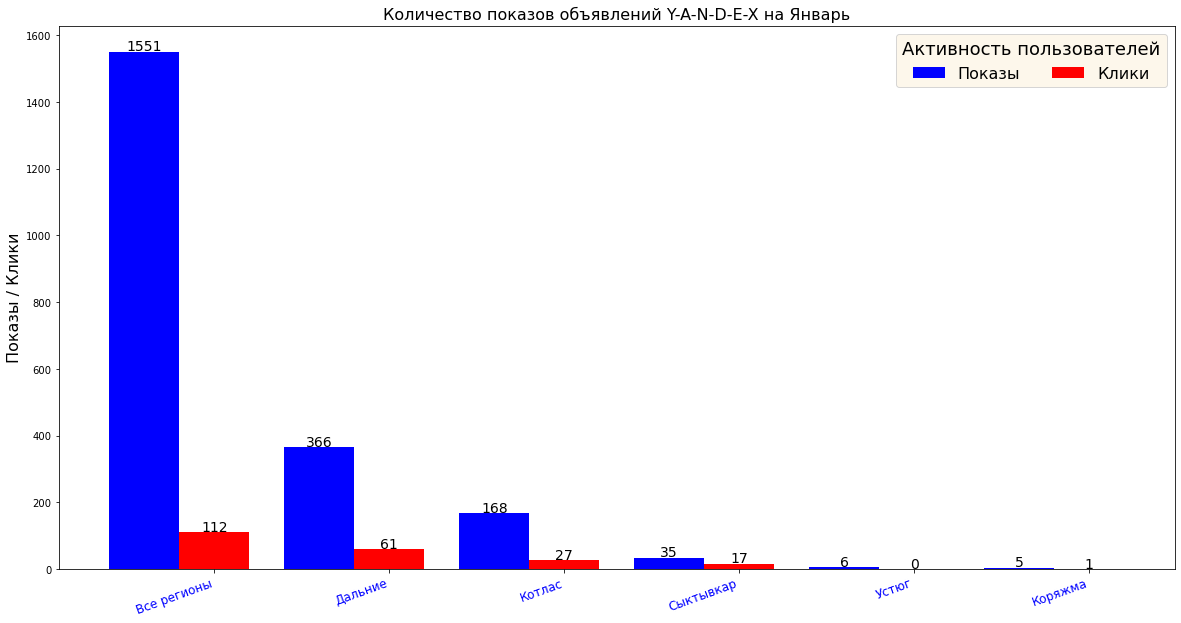

In [675]:
# Гистограмма 'Количество показов и кликов объявлений' за выбранный месяц (1-Январь)
popular_query = search_report_month(phr, 1, 1).sort_values('sum_shows', ascending=False)
title = popular_query['month'][0]

fig = plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений Y-A-N-D-E-X на ' + title, fontsize=16)
width = 0.2
x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

shows = popular_query.sum_shows.to_list()
click = popular_query.sum_click.to_list()

ax = plt.subplot(111)
shows = ax.bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
click = ax.bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

ax.set_ylabel('Показы / Клики', fontsize=16)
ax.set_xticks(x+width)

ax.set_xticklabels(popular_query.group,
                  fontsize = 12, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax.legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка
         
def autolabel(rects):
    for p in rects.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows)
autolabel(click)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики на ' + title + '.png')

<ipython-input-678-76fa5ae3e2a5>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


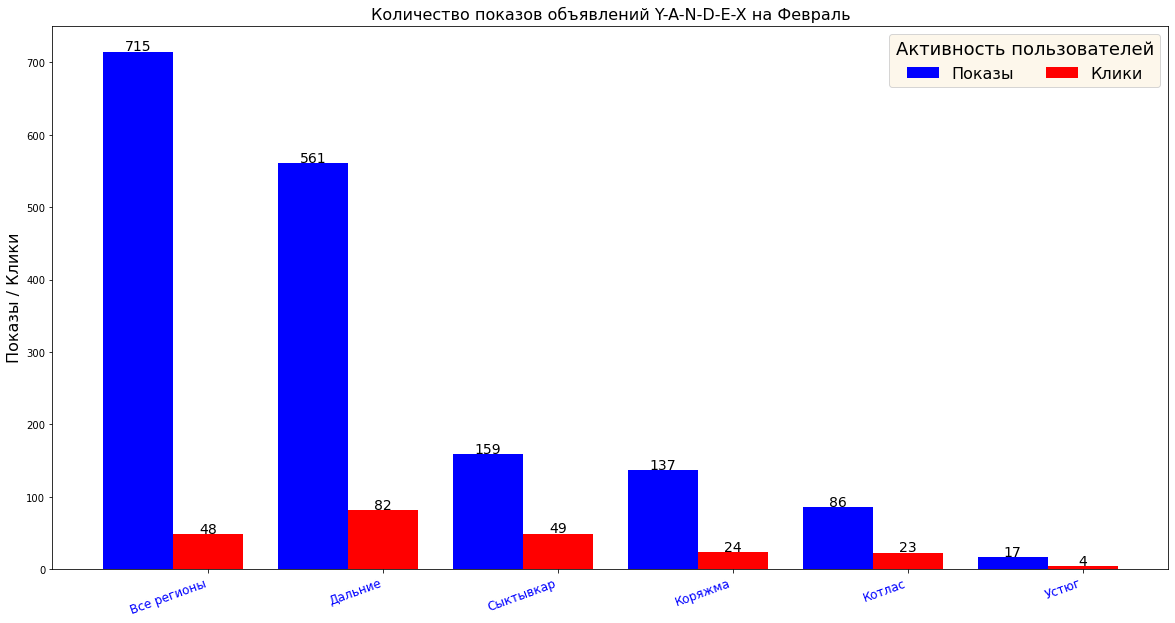

In [678]:
# Гистограмма 'Количество показов и кликов объявлений' за выбранный месяц (2-Февраль)
popular_query = search_report_month(phr, 2, 1).sort_values('sum_shows', ascending=False)
title = popular_query['month'][0]

fig = plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений Y-A-N-D-E-X на ' + title, fontsize=16)
width = 0.2
x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

shows = popular_query.sum_shows.to_list()
click = popular_query.sum_click.to_list()

ax = plt.subplot(111)
shows = ax.bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
click = ax.bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

ax.set_ylabel('Показы / Клики', fontsize=16)
ax.set_xticks(x+width)

ax.set_xticklabels(popular_query.group,
                  fontsize = 12, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax.legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка
         
def autolabel(rects):
    for p in rects.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows)
autolabel(click)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики yandex на ' + title + '.png')

<ipython-input-418-ce2b16301493>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


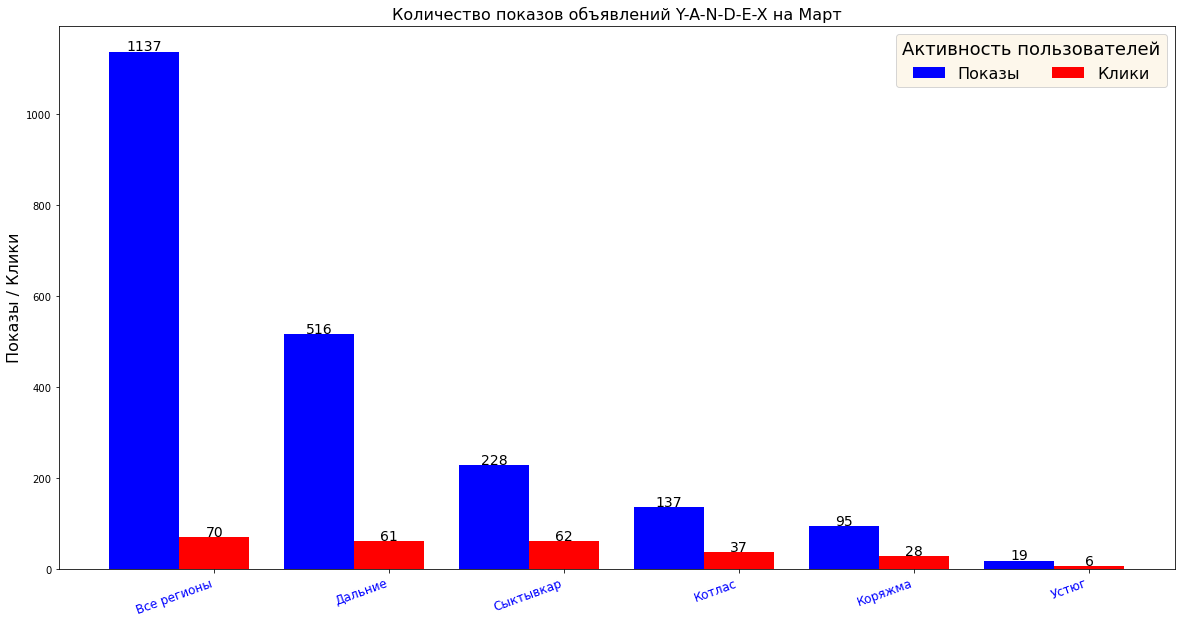

In [418]:
# Гистограмма 'Количество показов и кликов объявлений' за выбранный месяц (3-Март)
popular_query = search_report_month(phr, 3, 1).sort_values('sum_shows', ascending=False)
title = popular_query['month'][0]

fig = plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений Y-A-N-D-E-X на ' + title, fontsize=16)
width = 0.2
x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

shows = popular_query.sum_shows.to_list()
click = popular_query.sum_click.to_list()

ax = plt.subplot(111)
shows = ax.bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
click = ax.bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

ax.set_ylabel('Показы / Клики', fontsize=16)
ax.set_xticks(x+width)

ax.set_xticklabels(popular_query.group,
                  fontsize = 12, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax.legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка
         
def autolabel(rects):
    for p in rects.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows)
autolabel(click)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики yandex на ' + title + '.png')

<ipython-input-33-1fe5d30170f3>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


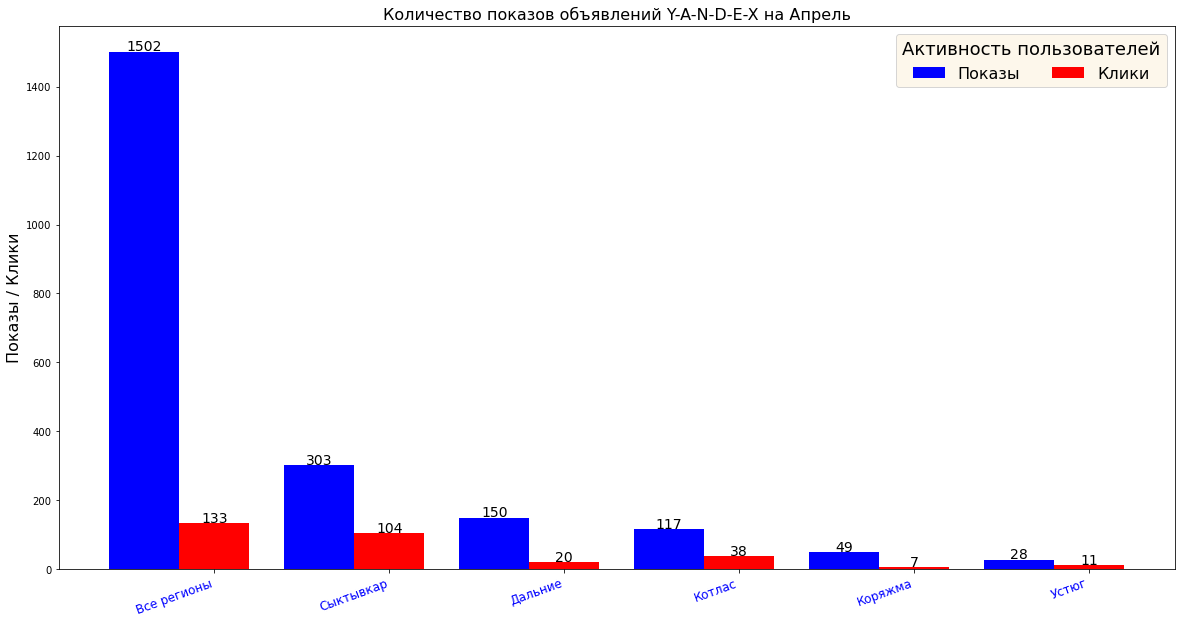

In [33]:
# Гистограмма 'Количество показов и кликов объявлений' за выбранный месяц (4-Апрель)
popular_query = search_report_month(phr, 4, 1).sort_values('sum_shows', ascending=False)
title = popular_query['month'][0]

fig = plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений Y-A-N-D-E-X на ' + title, fontsize=16)
width = 0.2
x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

shows = popular_query.sum_shows.to_list()
click = popular_query.sum_click.to_list()

ax = plt.subplot(111)
shows = ax.bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
click = ax.bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

ax.set_ylabel('Показы / Клики', fontsize=16)
ax.set_xticks(x+width)

ax.set_xticklabels(popular_query.group,
                  fontsize = 12, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax.legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка
         
def autolabel(rects):
    for p in rects.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows)
autolabel(click)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики yandex на ' + title + '.png')

# Количество показов объявлений за декабрь - март

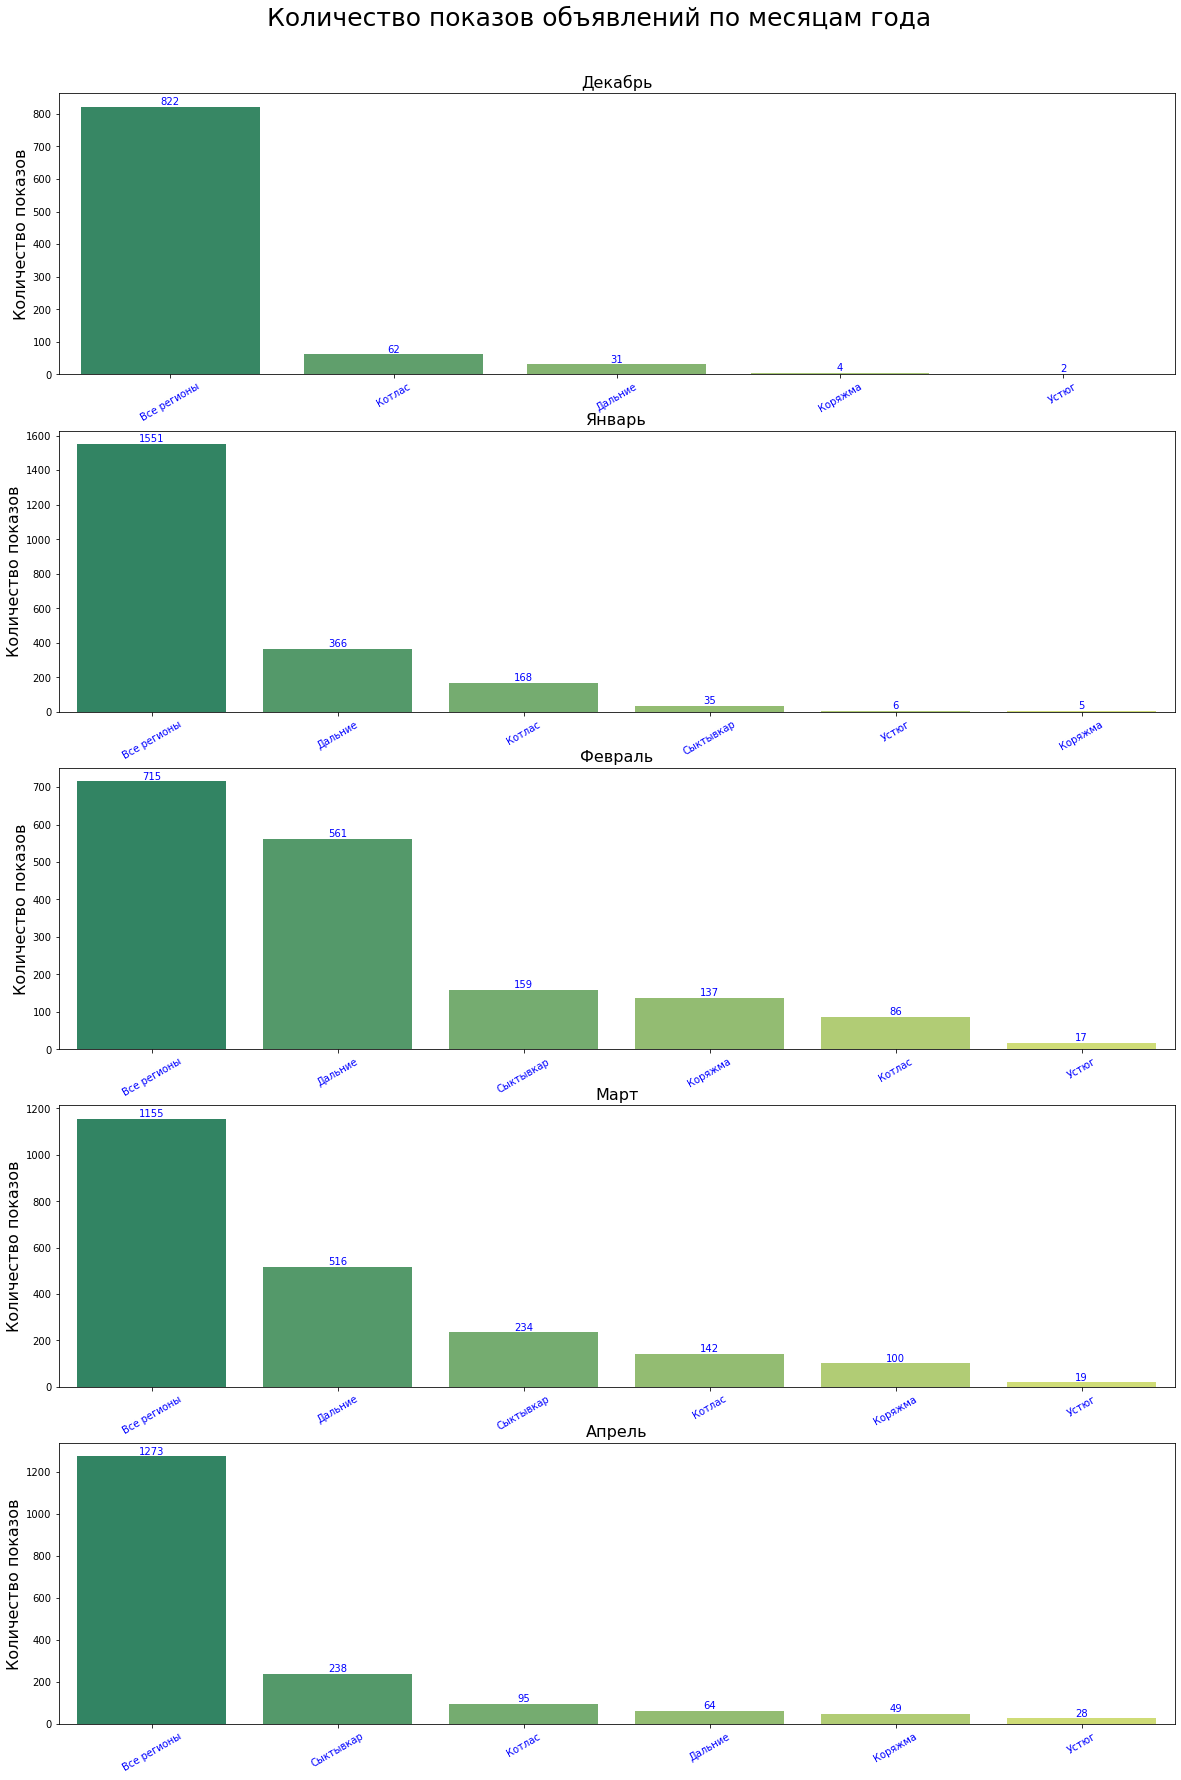

In [99]:
# Гистограмма 'Количество показов объявлений' за декабрь - апрель
m = {0:12, 1:1, 2:2, 3:3, 4:4}
fig, ax = plt.subplots(5, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(5):
    popular_query = search_report_month(phr, m[i], 1).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    ax[i].set_title(title, fontsize=16)
    sns.barplot(x='group', 
                y='sum_shows', 
                data=popular_query,
                palette='summer',
                ax=ax[i])
    ax[i].set_xlabel('', fontsize=10)
    ax[i].set_ylabel('Количество показов', fontsize=16)
    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 30,    #  Поворот текста
                       verticalalignment =  'top')    #  Вертикальное выравнивание
    # annotation here
    for p in ax[i].patches:
        ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                       textcoords='offset points')
    fig.set_figheight(30)
    fig.set_figwidth(20)

plt.show()

# Самые популярные показы за неделю по группам

In [34]:
# &&&&&&&&&& LOVELY_PHRASE_GROUP &&&&&&&&&&      ТОП-10 САМЫХ ПОПУЛЯРНЫХ ПОИСКОВЫХ ФРАЗ ПО КАТЕГОРИЯМ
# Делаем ОБЩУЮ группировку данных (вместе с AUTOTARGETING) по группам объявлений для вычисления нужных показателей
# и самых популярных запросов

def lovely_phr_group_sq(df, top):

# TABLE_4: Количество уникальных условий показов для каждой группы
    lovely_condition = df.groupby('group', as_index=False) \
        .agg({'search_query': pd.Series.nunique}) \
        .rename(columns={'search_query': 'unique_condition'})
    
# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ УЛОВИЯМ ПОКАЗА в каждой группе
    lovely_condition_count = df.groupby(['group', 'search_query'], as_index=False) \
        .agg({'shows': 'sum'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(top) \
        .rename(columns={'search_query': 'popular_shows','shows': 'count_popular_shows'})

# Объединяем ПЯТЬ табличек: "lovely_condition_count", "lovely_condition", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.

    popular_condition = lovely_condition \
        .merge(lovely_condition_count, on='group', how='inner') \
        .sort_values(['group', 'count_popular_shows'], ascending = [True, False])
# Сортируем итоговую таблицу по количеству популярных условий показов    

    return popular_condition

In [35]:
# Делаем выборку - самые популярные поисковые фразы по категориям
lovely_phr_group = lovely_phr_group_sq(phr_w, 5)
lovely_phr_group.shape

(20, 4)

In [36]:
lovely_phr_group.head(30)

,group,unique_condition,popular_shows,count_popular_shows
0,Все регионы,145,баня бочка,20
1,Все регионы,145,каркасная баня,9
2,Все регионы,145,изготовление бань,8
3,Все регионы,145,мобильная баня,6
4,Все регионы,145,бери баню официальный сайт калькулятор,5
5,Дальние,53,баня бочка,17
6,Дальние,53,баня под ключ,5
7,Дальние,53,баня бочка под ключ,3
8,Дальние,53,баня бочка под ключ цена,3
9,Дальние,53,модульная баня,3


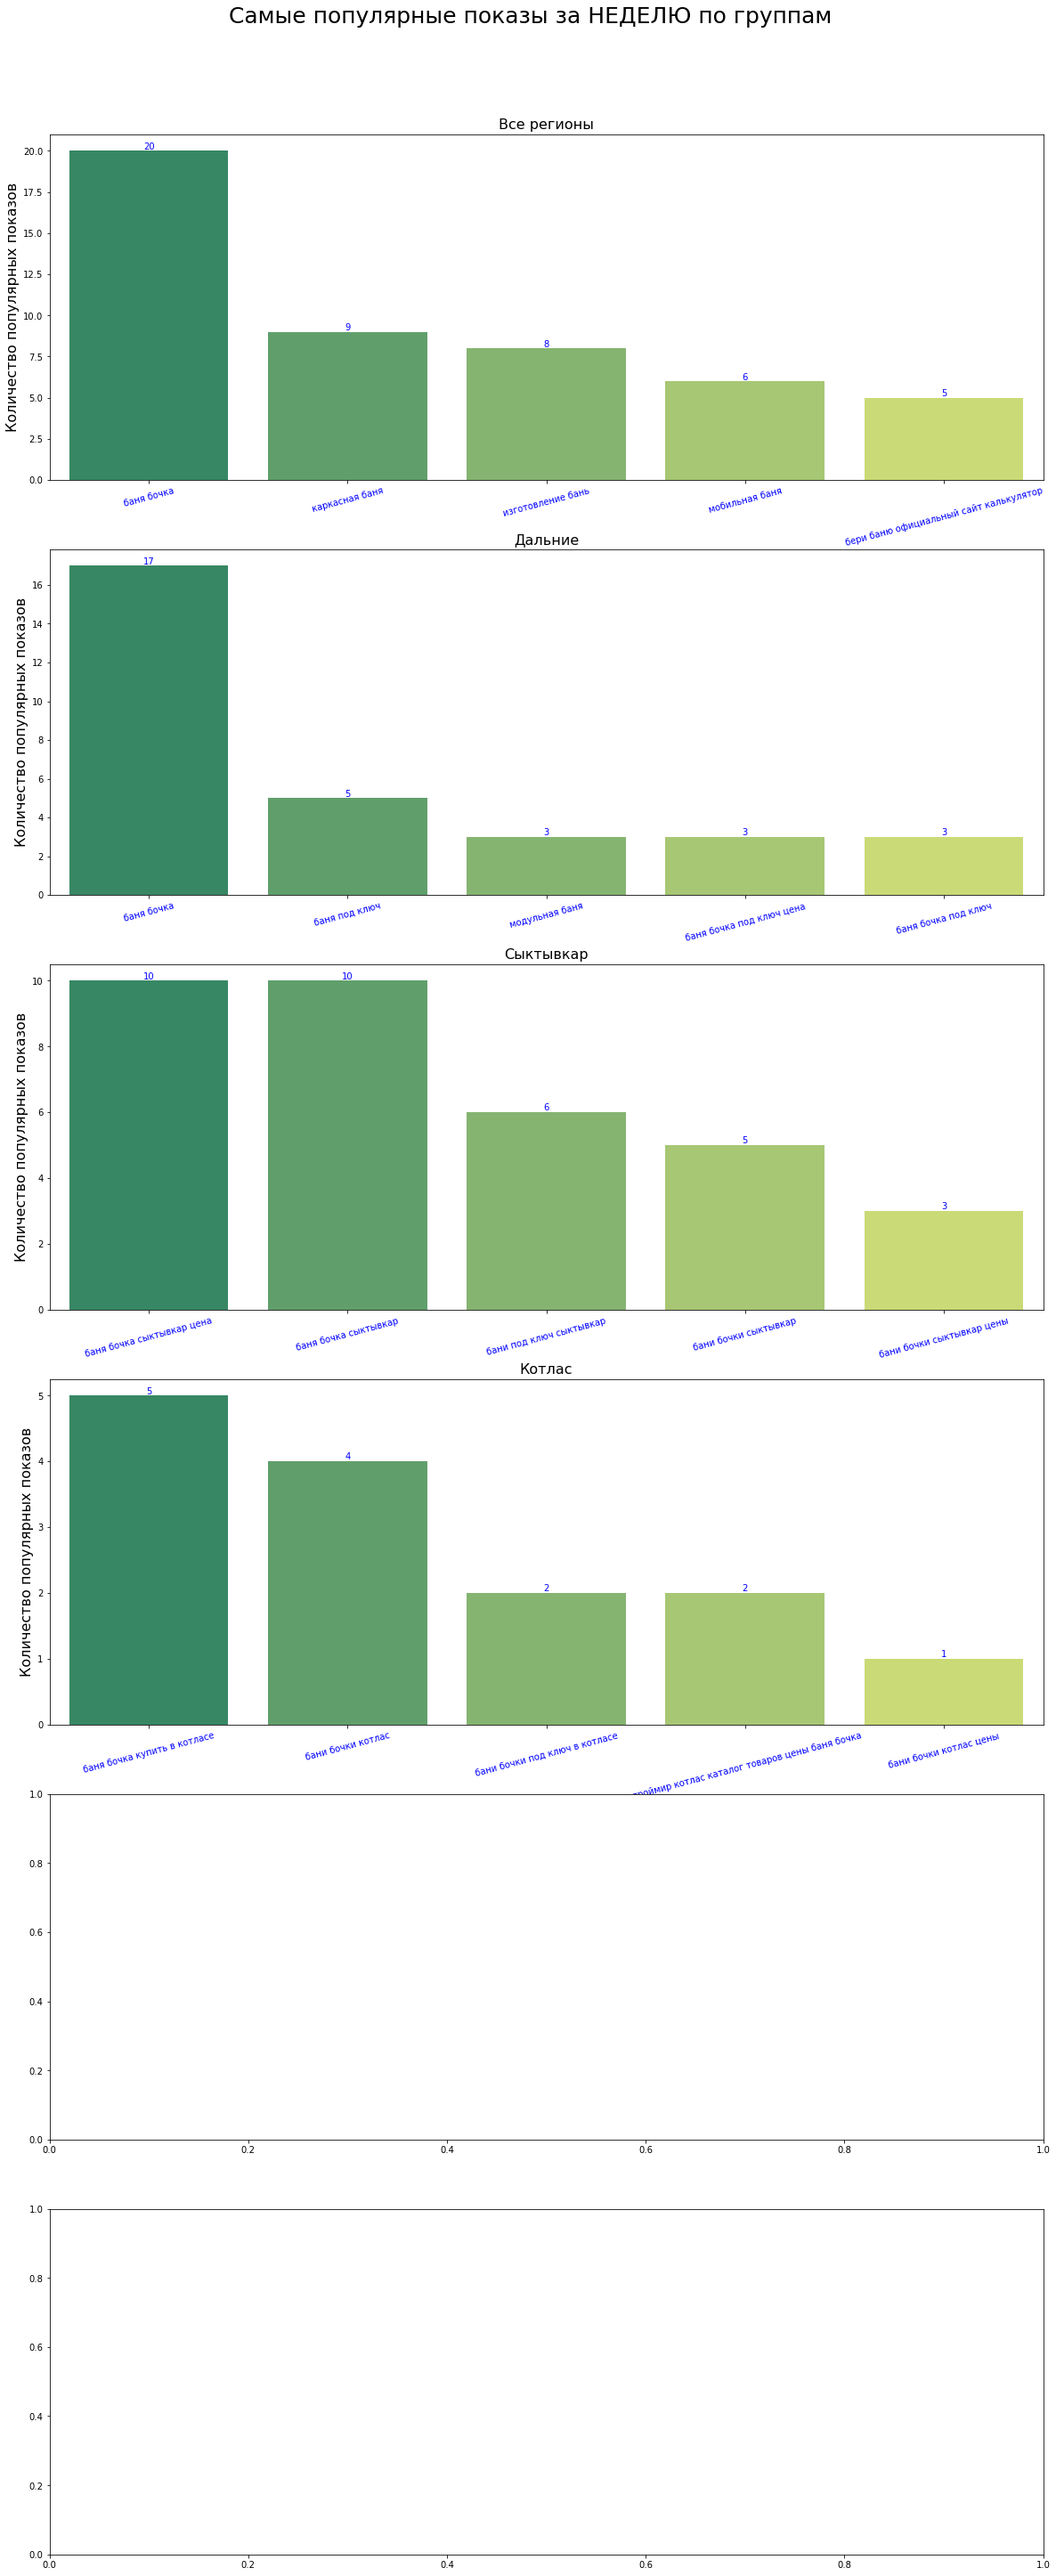

In [39]:
# Гистограмма 'Самые популярные показы за неделю по группам'
# g = {0:'Все регионы', 1:'Дальние', 2:'Сыктывкар', 3:'Котлас', 4:'Коряжма', 5:'Устюг'}
g = {0:'Все регионы', 1:'Дальние', 2:'Сыктывкар', 3:'Котлас'}
fig, ax = plt.subplots(6, 1)
#  Заголовок области Figure:
fig.suptitle('Самые популярные показы за НЕДЕЛЮ по группам',
             y = 0.92,
             fontsize = 25)

for i in range(4):
    popular_query = lovely_phr_group_sq(phr_w, 5).sort_values('count_popular_shows', ascending=False)
#     popular_query = lovely_phr_group_sq(phr, 5).sort_values('count_popular_shows', ascending=False)
    title = g[i]
    ax[i].set_title(title, fontsize=16)
    sns.barplot(x='popular_shows', 
                y='count_popular_shows', 
                data=popular_query.query("group == @title"),
                palette='summer',
                ax=ax[i])
    ax[i].set_xlabel('', fontsize=10)
    ax[i].set_ylabel('Количество популярных показов', fontsize=16)
    ax[i].set_xticklabels(popular_query.query("group == @title").popular_shows,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 15,    #  Поворот текста
                       verticalalignment =  'top')    #  Вертикальное выравнивание
    # annotation here
    for p in ax[i].patches:
        ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                       textcoords='offset points')
    fig.set_figheight(50)
    fig.set_figwidth(20)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Самые популярные показы.png')

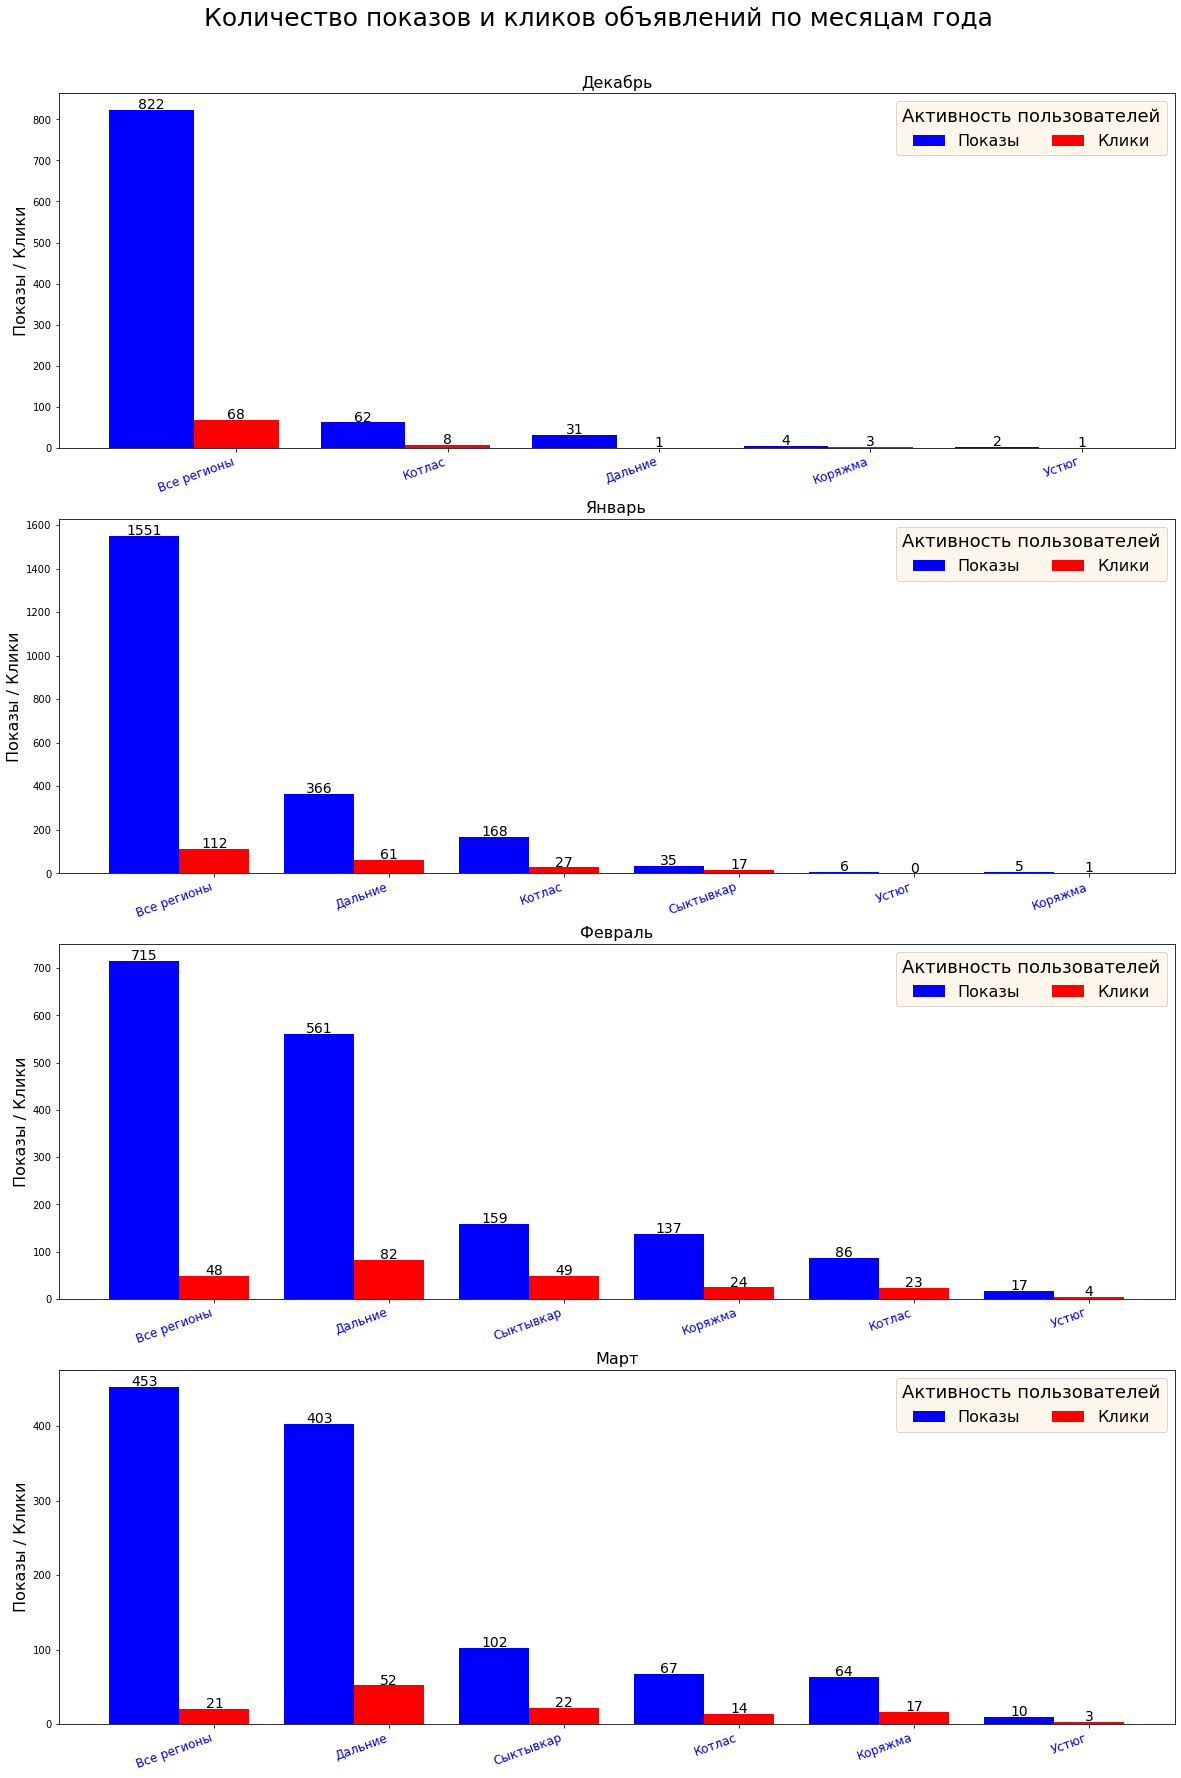

In [685]:
# Гистограмма 'Количество показов и кликов объявлений' за декабрь - март
m = {0 : 12, 1 : 1, 2 : 2, 3 : 3}
fig, ax = plt.subplots(4, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(4):
    popular_query = search_report_month(phr, m[i], 1).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 12, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
    fig.set_figheight(30)
    fig.set_figwidth(20)

plt.show()

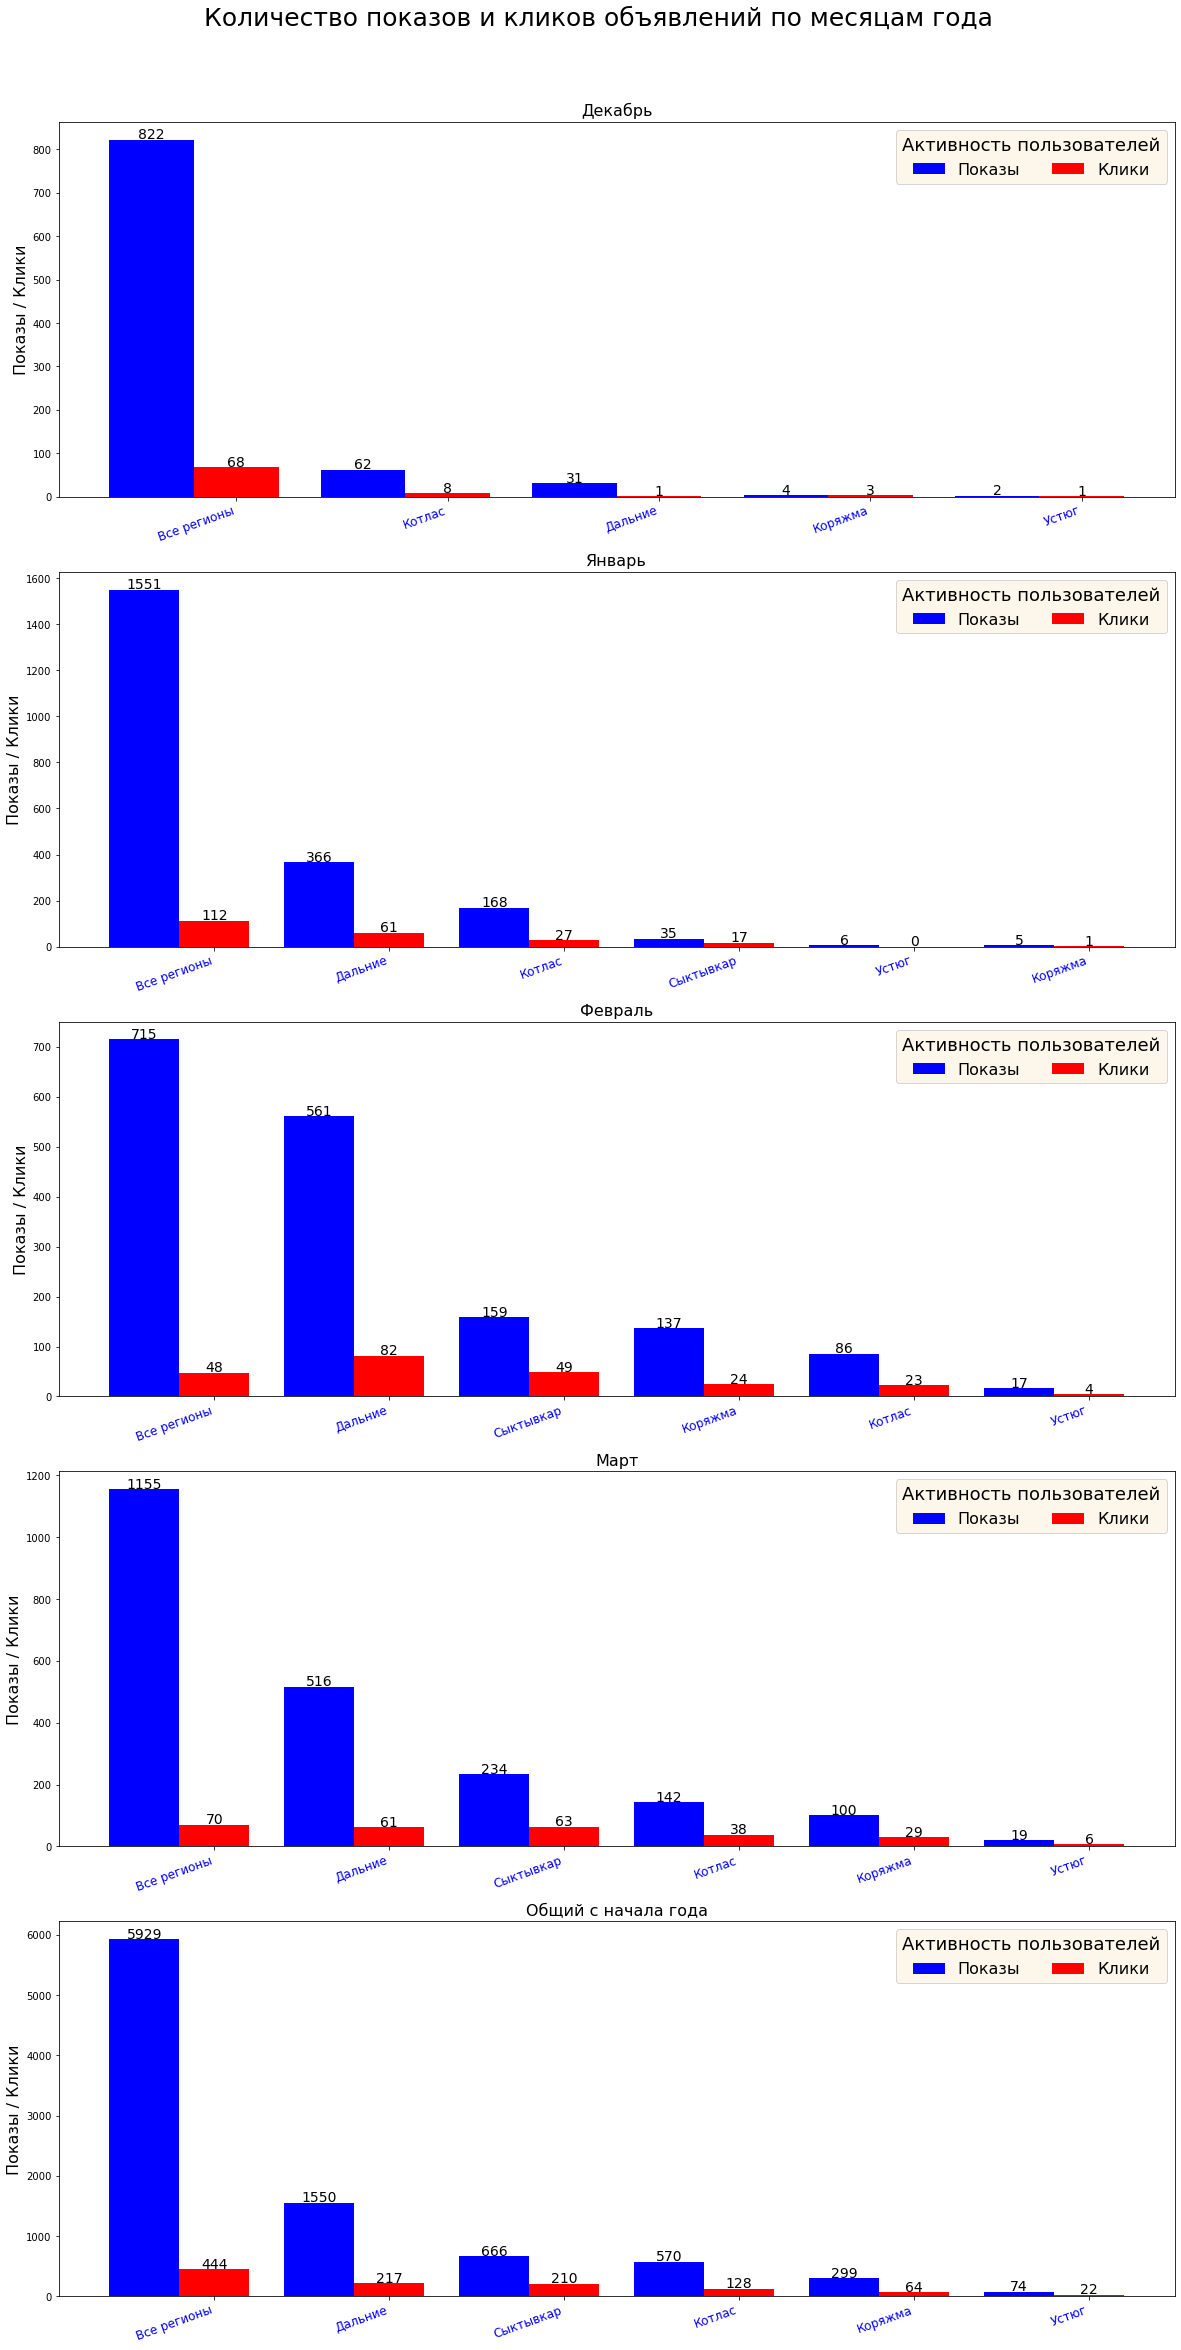

In [96]:
# Гистограмма 'Количество показов и кликов объявлений' за декабрь - март + ОБЩИЙ
m = {0 : 12, 1 : 1, 2 : 2, 3 : 3}
fig, ax = plt.subplots(5, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(4):
    popular_query = search_report_month(phr, m[i], 1).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 12, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
#    fig.set_figheight(20)
#    fig.set_figwidth(20)

popular_query_all = lovely_phr(phr, 1).sort_values('sum_shows', ascending=False)
width = 0.2
x = np.arange(1, popular_query_all.shape[0]+1)
# x = np.arange(1, 19)

shows1 = popular_query_all.sum_shows.to_list()
click1 = popular_query_all.sum_click.to_list()

ax[i+1].set_title('Общий с начала года', fontsize=16)

shows1 = ax[i+1].bar(x-width, shows1, width = 0.4, color='b', align='center', label = 'Показы')
click1 = ax[i+1].bar(x+width, click1, width = 0.4, color='r', align='center', label = 'Клики')

ax[i+1].set_ylabel('Показы / Клики', fontsize=16)
ax[i+1].set_xticks(x+width)

ax[i+1].set_xticklabels(popular_query_all.group,
                  fontsize = 12, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax[i+1].legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка

def autolabel(rects):
    for p in rects.patches:
        ax[i+1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows1)
autolabel(click1)
fig.set_figheight(40)
fig.set_figwidth(20)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики с начала года.png')

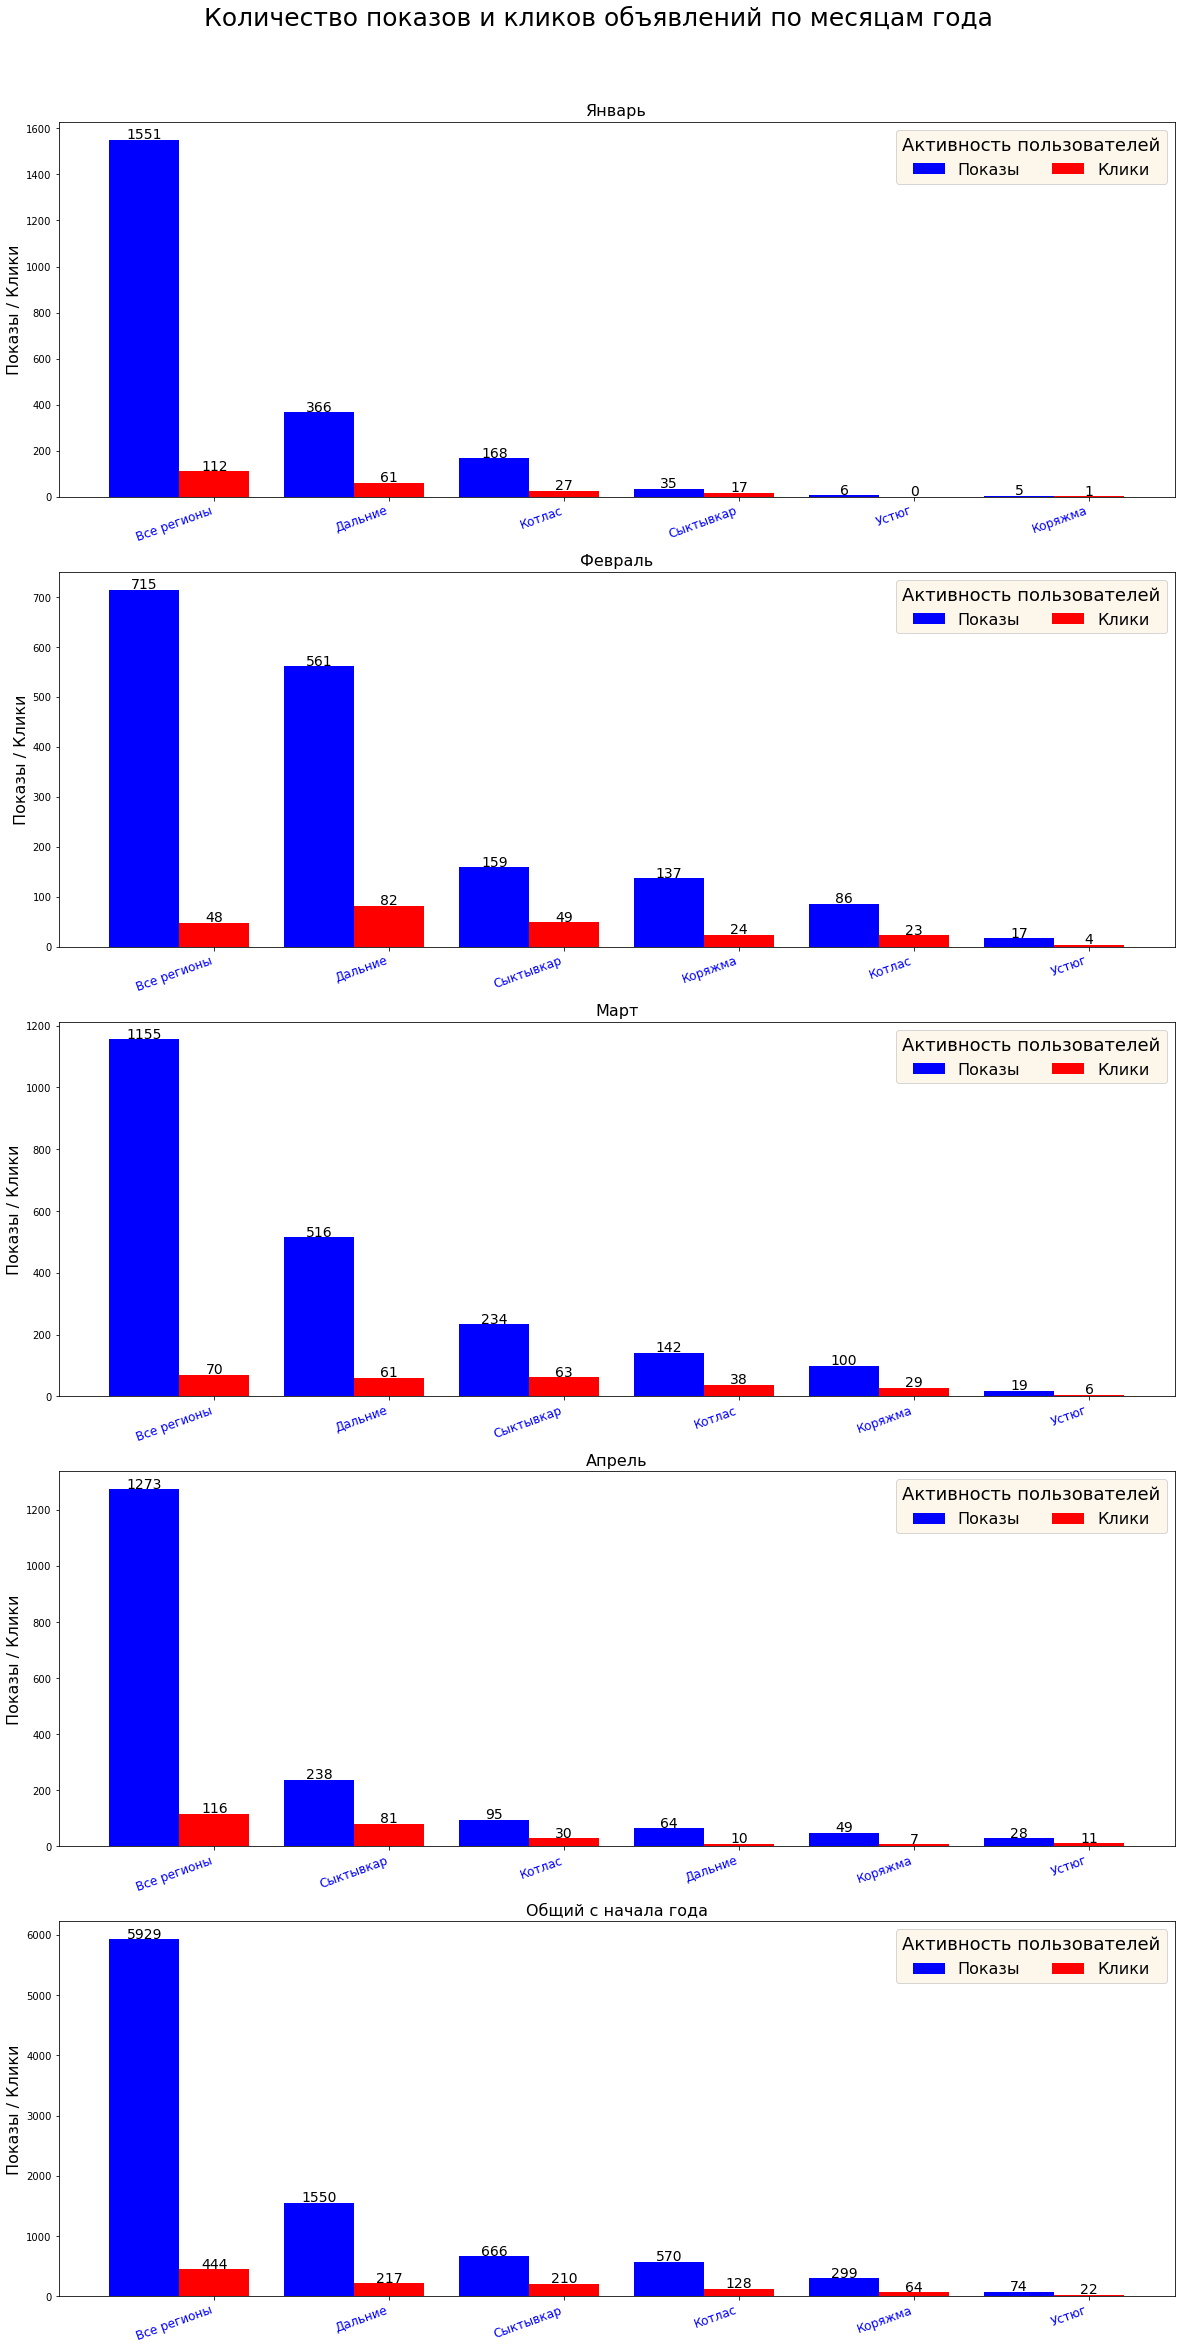

In [95]:
# Гистограмма 'Количество показов и кликов объявлений' за январь - апрель + ОБЩИЙ
m = {0 : 1, 1 : 2, 2 : 3, 3 : 4}
fig, ax = plt.subplots(5, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(4):
    popular_query = search_report_month(phr, m[i], 1).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 12, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
#    fig.set_figheight(20)
#    fig.set_figwidth(20)

popular_query_all = lovely_phr(phr, 1).sort_values('sum_shows', ascending=False)
width = 0.2
x = np.arange(1, popular_query_all.shape[0]+1)
# x = np.arange(1, 19)

shows1 = popular_query_all.sum_shows.to_list()
click1 = popular_query_all.sum_click.to_list()

ax[i+1].set_title('Общий с начала года', fontsize=16)

shows1 = ax[i+1].bar(x-width, shows1, width = 0.4, color='b', align='center', label = 'Показы')
click1 = ax[i+1].bar(x+width, click1, width = 0.4, color='r', align='center', label = 'Клики')

ax[i+1].set_ylabel('Показы / Клики', fontsize=16)
ax[i+1].set_xticks(x+width)

ax[i+1].set_xticklabels(popular_query_all.group,
                  fontsize = 12, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax[i+1].legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка

def autolabel(rects):
    for p in rects.patches:
        ax[i+1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows1)
autolabel(click1)
fig.set_figheight(40)
fig.set_figwidth(20)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики с начала года.png')

# ТОП-10 самых дорогих запросов за неделю

In [40]:
# Сортировка по убыванию средней цены кликов
def top_average_click(df, top):
    df = df.sort_values(['average_cost_click'], ascending = [False]) \
        .head(top)
    
    return df

In [41]:
top_average = top_average_click(phr_w, 5)
# top_average.shape
top_average

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
5,26.04.2024,баня бочка купить в котласе,Котлас,баня бочка купить котлас,4,2,50.0,247.33,123.66,2,26,Апрель,4,2024
10,28.04.2024,баня бочка,Дальние,autotargeting,4,2,50.0,202.76,101.38,0,28,Апрель,4,2024
63,28.04.2024,где можно взять кредит на баню бочку,Все регионы,autotargeting,2,1,50.0,91.61,91.61,0,28,Апрель,4,2024
79,22.04.2024,баня бочка 8 метровая,Котлас,autotargeting,1,1,100.0,90.70,90.70,0,22,Апрель,4,2024
146,25.04.2024,готовая баня в котласе,Котлас,бани готовые котлас,1,1,100.0,90.66,90.66,0,25,Апрель,4,2024


In [42]:
# Метод 1: вернуть строку с максимальным значением
# top_max = top_average[top_average['average_cost_click'] == top_average['average_cost_click'].max()]
# # print('{} / {}'.format(top_max.search_query.unique()[0], top_max.group.unique()[0]))
# # .astype(str)
# top_list = []
# top_list.append(top_max.search_query.unique()[0])
# top_list.append(top_max.group.unique()[0])
# top_list

def average(df, top):
    df = top_average_click(df, top)
    for i in df:
        search = group = []
        search.append(df.search_query.unique()[0])
        group.append(df.group.unique()[0])
        
    return group

In [43]:
test = average(phr_w, 3)
test

['баня бочка купить в котласе', 'Котлас']

In [331]:
search = group = []
# group = []
print(search, group)

[] []


In [313]:
for i in top_list:
    print(i)

баня под ключ в сыктывкаре
Сыктывкар


In [332]:
# Метод 1: вернуть строку с максимальным значением
top_max = top_average[top_average['average_cost_click'] == top_average['average_cost_click'].max()]
# print('{} / {}'.format(top_max.search_query.unique()[0], top_max.group.unique()[0]))
# .astype(str)
top_list = []
top_list.append(top_max.search_query.unique()[0])
top_list.append(top_max.group.unique()[0])
top_list

['баня под ключ в сыктывкаре', 'Сыктывкар']

In [305]:
top_average.describe()
# top_average.describe().average_cost_click.max()

,shows,click,ctr,expense,average_cost_click,conversion,date_number,month_number,year
count,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.0
mean,1.0,1.0,100.0,79.894000,79.894000,0.400000,21.600000,3.0,2024.0
std,0.0,0.0,0.0,5.004541,5.004541,0.547723,2.302173,0.0,0.0
min,1.0,1.0,100.0,72.020000,72.020000,0.000000,18.000000,3.0,2024.0
25%,1.0,1.0,100.0,77.810000,77.810000,0.000000,21.000000,3.0,2024.0
50%,1.0,1.0,100.0,82.490000,82.490000,0.000000,22.000000,3.0,2024.0
75%,1.0,1.0,100.0,83.570000,83.570000,1.000000,23.000000,3.0,2024.0
max,1.0,1.0,100.0,83.580000,83.580000,1.000000,24.000000,3.0,2024.0


In [287]:
# top_max = top(top_average_click(phr, 5))

# ТОП-10 самых ДЕШЁВЫХ запросов за неделю

In [87]:
# Сортировка по убыванию средней цены кликов
def min_average_click(df, top):
    df = df.query("click > 0") \
        .sort_values(['average_cost_click'], ascending = [False]) \
        .tail(top)
    
    return df

In [178]:
# min_average = min_average_click(phr, 5)
# min_average.shape
# min_average

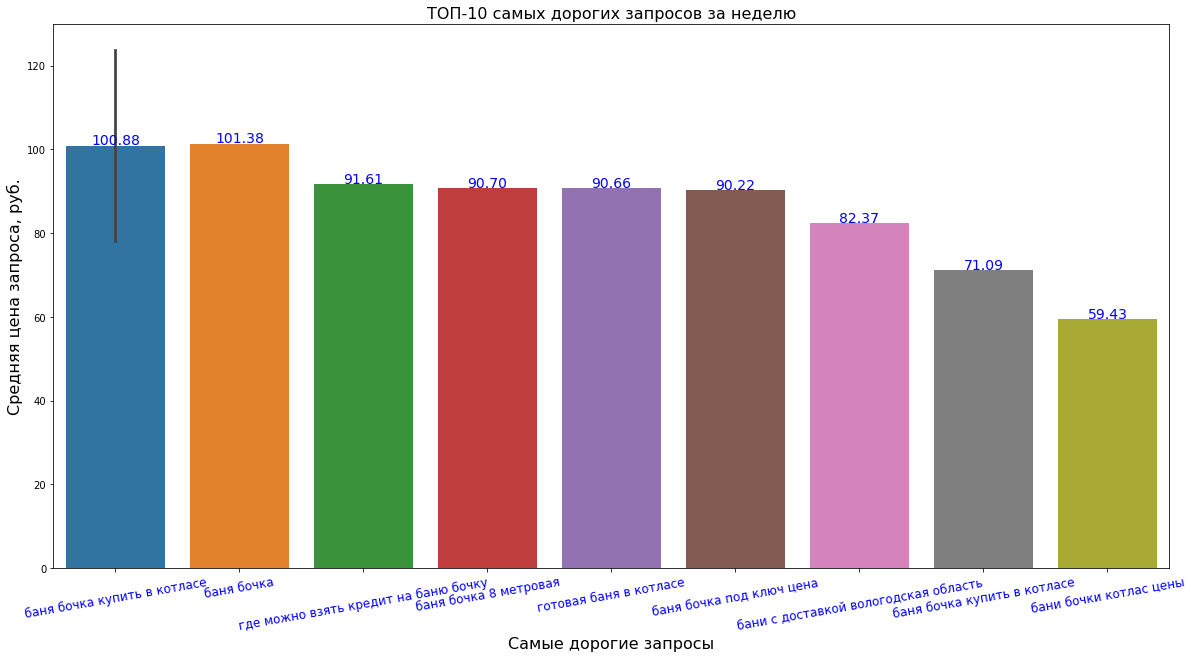

In [45]:
# Гистограмма 'ТОП-10 самых дорогих запросов за неделю'
average_cost = top_average_click(phr_w, 10)
fig = plt.figure(figsize=(20, 10))
plt.title('ТОП-10 самых дорогих запросов за неделю', fontsize=16)

ax_sum=sns.barplot(x='search_query', 
            y='average_cost_click', 
            data=average_cost)
# col = ['average_cost.search_query.apply(lambda x: x[:50]', 'average_cost.group']
# color = ['b', 'r']
ax_sum.set_xlabel('Самые дорогие запросы', fontsize=16)
ax_sum.set_ylabel('Средняя цена запроса, руб.', fontsize=16)
ax_sum.set_xticklabels(average_cost.search_query.apply(lambda x: x[:50]), fontsize = 12, color = 'b', rotation = 10, verticalalignment ='top')

# annotation here
for p in ax_sum.patches:
    ax_sum.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, color='b', xytext=(0, 5),
                    textcoords='offset points')
  
plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Самые дорогие запросы.png')

In [ ]:
# Гистограмма 'ТОП-10 самых дорогих запросов за неделю'
average_cost = top_average_click(phr, 7)
plt.figure(figsize=(20, 10))
plt.title('ТОП-10 самых дорогих запросов за неделю', fontsize=16)

# Метод 1: вернуть строку с максимальным значением
top_max = top_average[top_average['average_cost_click'] == top_average['average_cost_click'].max()]
# print('{} / {}'.format(top_max.search_query.unique()[0], top_max.group.unique()[0]))
# .astype(str)
top_list = []
top_list.append(top_max.search_query.unique()[0])
top_list.append(top_max.group.unique()[0])
top_list


ax_sum=sns.barplot(x='search_query', 
            y='average_cost_click', 
            data=average_cost)
col = ['average_cost.search_query.apply(lambda x: x[:50]', 'average_cost.group']
color = ['b', 'r']
ax_sum.set_xlabel('Самые дорогие запросы', fontsize=16)
ax_sum.set_ylabel('Средняя цена запроса, руб.', fontsize=16)
for i in range(1):
    ax_sum[i].set_xticklabels(col[i], fontsize = 12, color = color[i], rotation = 10, verticalalignment ='top')

# annotation here
for p in ax_sum.patches:
    ax_sum.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, color='b', xytext=(0, 5),
                    textcoords='offset points')
  
plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики с начала года.png')

# Самые дорогие показы ПО ГРУППАМ за неделю

In [46]:
# Сгруппированный по группам список за неделю - ПО СРЕДНЕЙ ЦЕНЕ ЗА КЛИК
def top_average_click_agg(df, top):
    df = df.sort_values(['average_cost_click'], ascending = [False]) \
        .query("click > 0") \
        .groupby(['group'], as_index=False) \
        .head(top) \
        .sort_values(['group', 'average_cost_click'], ascending = [True, False])
    
    return df

In [47]:
top_average_click = top_average_click_agg(phr_w, 5)
# top_average_click.shape
top_average_click

,date,search_query,group,condition,shows,click,ctr,expense,average_cost_click,conversion,date_number,month,month_number,year
63,28.04.2024,где можно взять кредит на баню бочку,Все регионы,autotargeting,2,1,50.00,91.61,91.61,0,28,Апрель,4,2024
262,28.04.2024,бани с доставкой вологодская область,Все регионы,autotargeting,1,1,100.00,82.37,82.37,0,28,Апрель,4,2024
267,28.04.2024,баня на заказ,Все регионы,autotargeting,1,1,100.00,46.73,46.73,1,28,Апрель,4,2024
134,25.04.2024,бани под ключ цена,Все регионы,баня под ключ цена,1,1,100.00,43.03,43.03,0,25,Апрель,4,2024
54,27.04.2024,баня бочка купить,Все регионы,баня бочка купить,2,1,50.00,34.78,34.78,0,27,Апрель,4,2024
10,28.04.2024,баня бочка,Дальние,autotargeting,4,2,50.00,202.76,101.38,0,28,Апрель,4,2024
61,28.04.2024,баня бочка под ключ цена,Дальние,autotargeting,2,1,50.00,90.22,90.22,0,28,Апрель,4,2024
218,27.04.2024,бани бочки в вологодской области под ключ цены,Дальние,autotargeting,1,1,100.00,57.13,57.13,0,27,Апрель,4,2024
12,22.04.2024,баня бочка,Дальние,autotargeting,3,2,66.67,93.56,46.78,1,22,Апрель,4,2024
266,28.04.2024,баня готовая купить,Дальние,autotargeting,1,1,100.00,37.55,37.55,0,28,Апрель,4,2024


In [221]:
# top_average_click.query("group == 'Все регионы'& average_cost_click > 80").search_query.unique() #[0][:2]
# top_average_click.query("group == 'Все регионы'& average_cost_click > 80").search_query.unique().dtype()
top_average_click.query("group == 'Все регионы'& average_cost_click > 80").search_query.apply(lambda x: x[:12]) #.astype(str)

1    баня под клю
Name: search_query, dtype: object

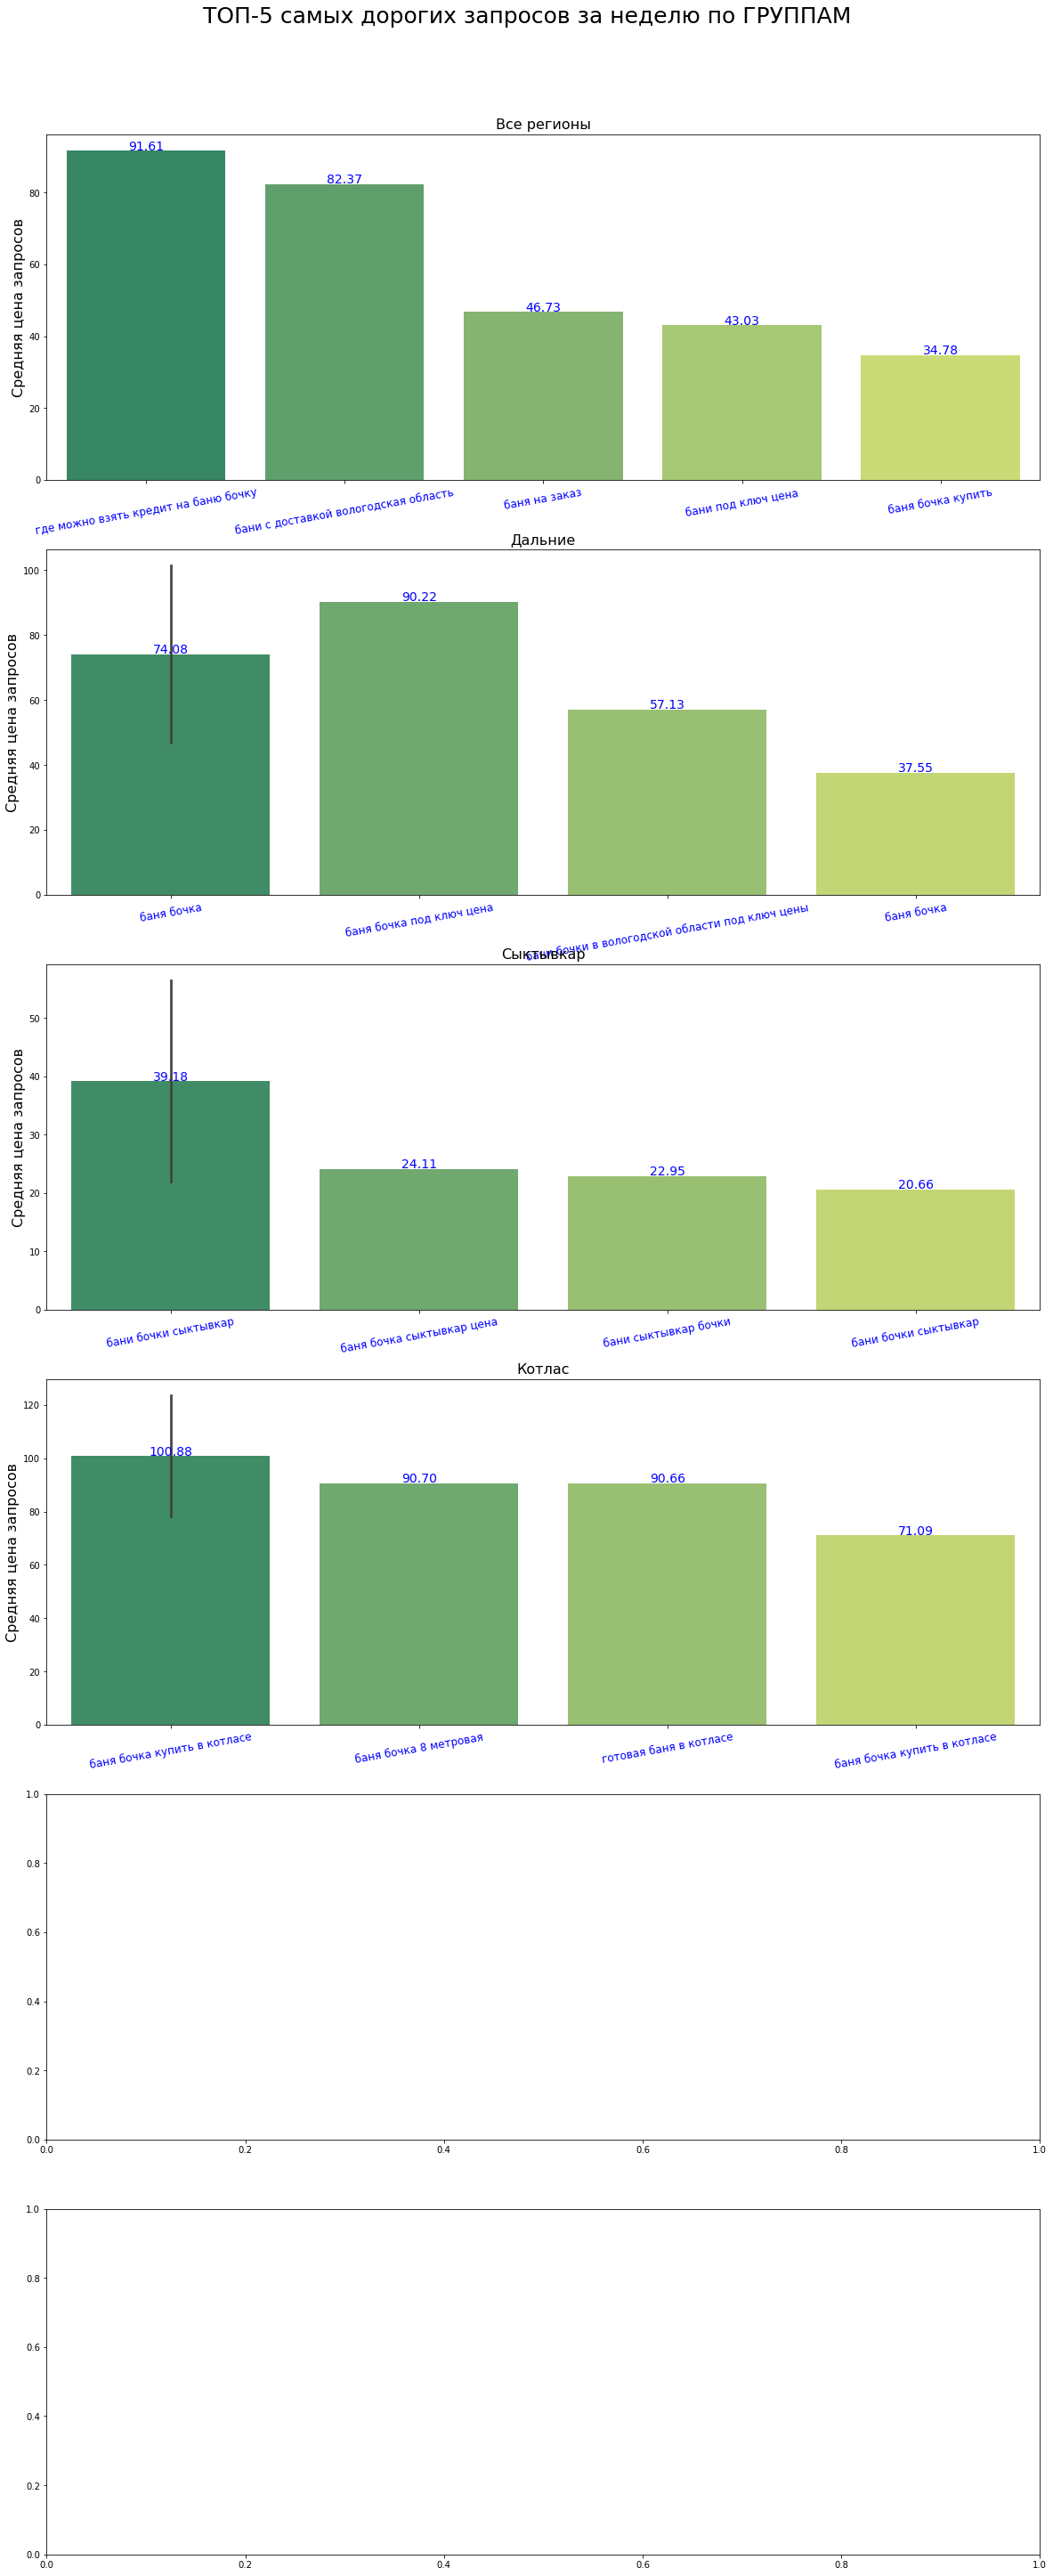

In [49]:
# Гистограмма 'ТОП-5 самых дорогих запросов за неделю по ГРУППАМ'
# g = {0:'Все регионы', 1:'Дальние', 2:'Сыктывкар', 3:'Котлас', 4:'Коряжма', 5:'Устюг'}
g = {0:'Все регионы', 1:'Дальние', 2:'Сыктывкар', 3:'Котлас'}
fig, ax = plt.subplots(6, 1)
#  Заголовок области Figure:
fig.suptitle('ТОП-5 самых дорогих запросов за неделю по ГРУППАМ',
             y = 0.92,
             fontsize = 25)

for i in range(4):
#     popular_query = lovely_phr_group(phr_w, 3).sort_values('count_popular_shows', ascending=False)
    average_cost = top_average_click_agg(phr_w, 5)
    title = g[i]
    ax[i].set_title(title, fontsize=16)
    sns.barplot(x='search_query', 
                y='average_cost_click', 
                data=average_cost.query("group == @title"),
                palette='summer',
                ax=ax[i])
    ax[i].set_xlabel('', fontsize=10)
    ax[i].set_ylabel('Средняя цена запросов', fontsize=16)
    ax[i].set_xticklabels(average_cost.query("group == @title").search_query.apply(lambda x: x[:50]),
                      fontsize = 12, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 10,    #  Поворот текста
                       verticalalignment =  'top')    #  Вертикальное выравнивание
    # annotation here
    for p in ax[i].patches:
        ax[i].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=14, color='b', xytext=(0, 5),
                       textcoords='offset points')
    fig.set_figheight(50)
    fig.set_figwidth(20)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Дорогие по группам.png')